## 1. Imports 

In [2]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=FutureWarning, module="seaborn")
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option("display.max_columns", None)

In [3]:
tr_df = pd.read_csv('train_data.csv')
ts_df  = pd.read_csv('test_data.csv')
pd.set_option("display.max_columns",None) 

In [4]:
train_df = tr_df.copy()
test_df = ts_df.copy()

## 2.Functions

### 2.1 Graph functions

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('bmh')

# show violine plot 
def show_violinplot(df,columns_):
    ax_ = math.ceil(math.sqrt(len(columns_)))
    fig, ax = plt.subplots(ax_, ax_,figsize=(ax_*4,ax_*4))
    axes = ax.flatten()
    for ind, col_ in enumerate(columns_):
        sns.violinplot(data=df, x=col_,ax=axes[ind])
        axes[ind].set_title(col_)
    for i in range(len(columns_), len(axes)):
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

# boxplot
def show_boxplot(df,columns_):
    ax_ = math.ceil(math.sqrt(len(columns_)))

    fig, ax = plt.subplots(ax_, ax_,figsize=(20,20))
    axes = ax.flatten()
    for ind, col_ in enumerate(columns_):
        sns.boxplot(data=df, x=columns_[ind],ax=axes[ind])
        axes[ind].set_title(columns_[ind])
    for i in range(len(columns_), len(axes)):
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

def show_versus_line_graph(df, col_1, col_2):
    f = df.groupby(col_1)[col_2].mean().reset_index()
    plt.figure(figsize=(10, 5))
    plt.plot(f[col_1], f[col_2], marker='o')
    plt.title(f"{col_1} vs {col_2} Analysis")
    plt.xlabel(col_1)
    plt.ylabel(f"Average {col_2}")
    plt.grid(True)
    # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def show_scatter_plot(df, col_):
    plt.figure(figsize=(10, 5))
    plt.scatter(df.index, df[col_], alpha=0.6,s=1)
    plt.title(f"Scatter Plot for {col_}")
    plt.xlabel("Index")
    plt.ylabel(col_)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import math
# g=train_df3.groupby(columns["geo_network"][2])["purchaseValue"].mean().sort_values(ascending=0)[:10]
def column_wise_distribution(df, columns_, target,title_):
    # plt.style.use("dark_background")
    col_num = len(columns_)
    cols = 4
    rows = math.ceil(col_num / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for idx, col_name in enumerate(columns_):
        # grouped = df.groupby(col_name)[target].mean().sort_values(ascending=0)[:10]
        grouped = df.groupby(col_name)[target].mean()
        
        sns.barplot(x=grouped.index, y=grouped.values, ax=axes[idx], color="teal")
        sns.lineplot(x=grouped.index, y=grouped.values, ax=axes[idx], marker="o", color="orange", linewidth=1)

        axes[idx].set_title(f'{target} over {col_name}', fontsize=10)
        axes[idx].tick_params(axis='x', labelrotation=90, labelsize=8)
        axes[idx].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Hide any unused axes
    for i in range(len(columns_), len(axes)):
        axes[i].axis("off")
    fig.suptitle(title_, fontsize=16)
    plt.tight_layout(h_pad=2.0)
    plt.show()


    # sns.barplot(x=col_1, y=col_2, data=grouped)
# show Distribution
def histplot_(df, columns_):
    # plt.style.use("dark_background")
    col_num = len(columns_)
    ax_ = math.ceil(math.sqrt(col_num)) 
    fig, axes = plt.subplots(ax_, ax_, figsize=(20, 20))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing
    for idx, col_name in enumerate(columns_):
        sns.histplot(df[col_name].dropna(), ax=axes[idx], kde=True, color='cyan')
        axes[idx].set_title(f'Distribution of {col_name}', fontsize=10)
    # axes.tick_params(labelrotation=90)
    for i in range(len(columns_), len(axes)):
        axes[i].axis('off')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def compare_trends(data,cols_):
    plt.style.use("default")
    plt.figure(figsize=(10,10))
    for i in cols_:
        sns.scatterplot(x=data.index,y=data[i],label=i)
        plt.xlabel("indexes")
        plt.ylabel("values")
        plt.legend()    
        plt.tight_layout()
    plt.show()
def plot_sorted(df,col_):
    plt.figure(figsize=(8,8))
    for i in col_:
        v=sorted(df[i].unique())
        sns.scatterplot(x=np.arange(len(v)),y=v,label=i)
        plt.legend()
        plt.tight_layout()
    plt.show()

### 2.2 drop_columns

In [6]:
def drop_cols(tr_df, ts_df, cols_):
  train_df_ = tr_df.drop(cols_, axis=1)
  test_df_ = ts_df.drop(cols_, axis=1)
  print([col for col in train_df_.columns if col not in test_df_.columns],train_df_.shape, test_df_.shape)
  return train_df_, test_df_


### 2.3 get timeseries data


In [7]:
TIME  = ['day',
 'day_of_week',
 'month',
 'quarter',
 'year',
 'day_of_year',
 'hour',]

In [8]:
def handle_dates(train_df, test_df):
    def _process(df_):
        df = df_.copy()

        # Process 'date'
        df["date"] = pd.to_datetime(df['date'], format='%Y%m%d')
        df["day"] = df["date"].dt.day
        df["day_of_week"] = df["date"].dt.day_of_week
        df["month"] = df["date"].dt.month
        df["quarter"] = df["date"].dt.quarter
        df["day_of_month"] = df['date'].dt.day
        df["year"] = df["date"].dt.year
        df["day_of_year"] = df["date"].dt.day_of_year
        df['dayofyear'] = df["date"].dt.dayofyear
        df['weekofyear'] = df["date"].dt.isocalendar().week


        # Process 'sessionStart'
        df["sessionStart"] = pd.to_datetime(df["sessionStart"], unit="s")
        df["hour"] = df["sessionStart"].dt.hour

        # Drop 'sessionStart'
        df = df.drop(["sessionStart"], axis=1)

        return df

    train_df_ = _process(train_df)
    test_df_ = _process(test_df)

    print([col for col in train_df_.columns if col not in test_df_.columns], train_df_.shape, test_df_.shape)
    return train_df_, test_df_

### 2.4 Get columns

In [9]:
def get_int_str_cols(df, treat_timeseries_as_cat=True):
    num_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()
    cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    time_cols = df.select_dtypes(include=["datetime64"]).columns.tolist()

    if treat_timeseries_as_cat:
        for col in time_cols:
            if col not in cat_cols:
                cat_cols.append(col)
            time_cols.remove(col)
    print("Distribution correct:", df.shape[1] == len(num_cols) + len(cat_cols)+len(time_cols))
    print("Total cols:", df.shape[1], "\nNumerical:", len(num_cols), "\nCategorical:", len(cat_cols),"\ntime cols", len(time_cols) )
    
    geoNetwork_=[]
    trafficSource_=[]
    for i in df.columns:
        if i.startswith("geoNetwork"):
            geoNetwork_.append(i) 
        elif i.startswith("trafficSource"):
            trafficSource_.append(i)
    columns = {
        "num_cols":num_cols,
        "cat_cols":cat_cols,
        "time_cols":time_cols,
        "cols":df.columns,
        "traffic_source":trafficSource_,
        "geo_network":geoNetwork_
    }
    return columns

columns = get_int_str_cols(train_df, treat_timeseries_as_cat=False)

Distribution correct: True
Total cols: 52 
Numerical: 14 
Categorical: 38 
time cols 0


In [10]:
"locationZone" in columns["num_cols"]

True

### 2.5 handle missing Value columns


In [11]:
def drop_missing_cols(train_df,test_df,threshold):
  too_much_missing = []
  for i in train_df.columns:
    perc_ = (train_df[i].isna().sum()/train_df.shape[0])*100
    if perc_ > threshold:
      too_much_missing.append(i)
  return too_much_missing

### 2.6 drop unique entries

In [12]:
def drop_cols_with_unique_values(train_df, test_df):
    unique_value_columns = [col for col in train_df.columns if len(train_df[col].unique()) == 1]

    train_df_ = train_df.drop(columns=unique_value_columns)
    test_df_ = test_df.drop(columns=[col for col in unique_value_columns if col in test_df.columns])

    print(f"Dropped columns (from train_df with unique values): {unique_value_columns}")
    print([col for col in train_df_.columns if col not in test_df_.columns], train_df_.shape, test_df_.shape)

    return train_df_, test_df_


convert the date columns into day, month and year to get more deep views

In [13]:
train_df2, test_df2 =handle_dates(train_df, test_df)
columns = get_int_str_cols(train_df2, treat_timeseries_as_cat=False)

['purchaseValue'] (116023, 61) (29006, 60)
Distribution correct: False
Total cols: 61 
Numerical: 21 
Categorical: 38 
time cols 1


## 3 Exploratory Data Analysis

### Missing Value Information

In [14]:
missing_value_perc =  (train_df2.isnull().sum()/train_df2.shape[0]).sort_values(ascending=0)

C:\Users\KuldeepChavda\AppData\Local\Temp\ipykernel_18360\3155981849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_value_perc.index,y=missing_value_perc.values,palette='viridis')
C:\Users\KuldeepChavda\AppData\Local\Temp\ipykernel_18360\3155981849.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=missing_value_perc.index,y=missing_value_perc.values,palette='viridis')


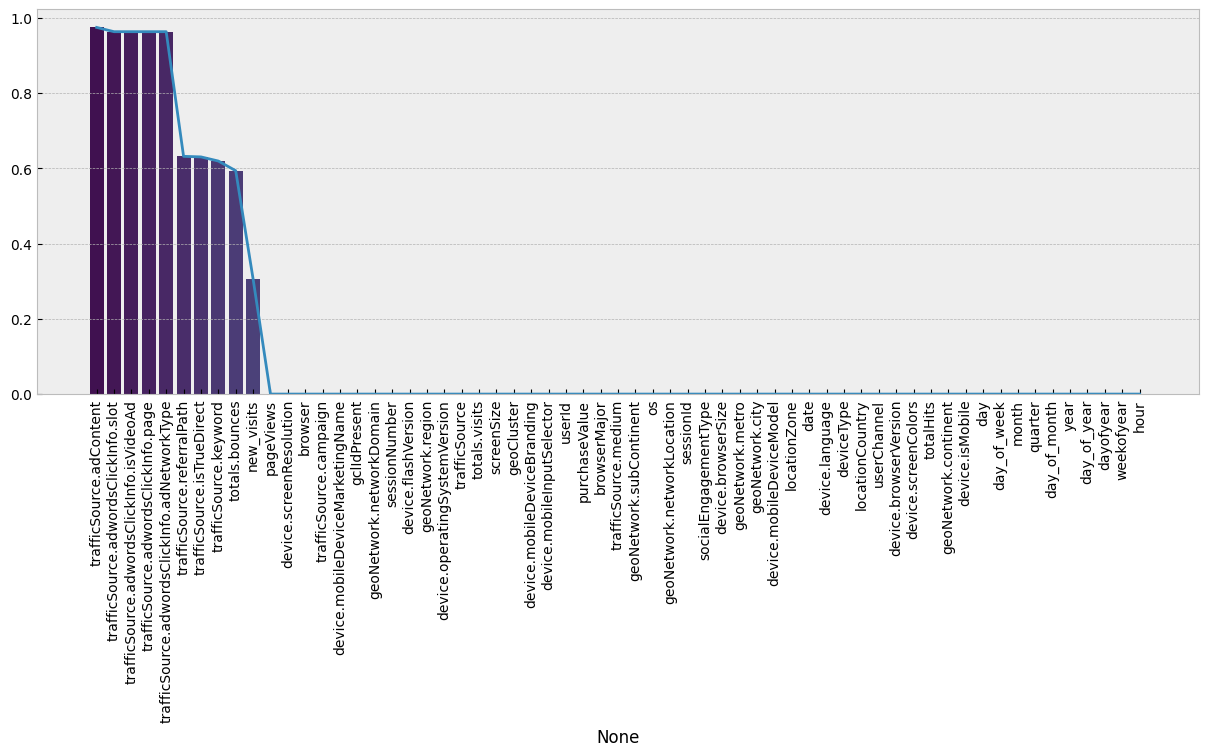

trafficSource.adContent                        0.97
trafficSource.adwordsClickInfo.slot            0.96
trafficSource.adwordsClickInfo.isVideoAd       0.96
trafficSource.adwordsClickInfo.page            0.96
trafficSource.adwordsClickInfo.adNetworkType   0.96
trafficSource.referralPath                     0.63
trafficSource.isTrueDirect                     0.63
trafficSource.keyword                          0.62
totals.bounces                                 0.59
new_visits                                     0.31
pageViews                                      0.00
device.screenResolution                        0.00
dtype: float64

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=missing_value_perc.index,y=missing_value_perc.values,palette='viridis')
sns.lineplot(x=missing_value_perc.index,y=missing_value_perc.values,palette='viridis')
plt.xticks(rotation=90)
plt.show()
missing_value_perc.head(12)

## Target Value Analysis

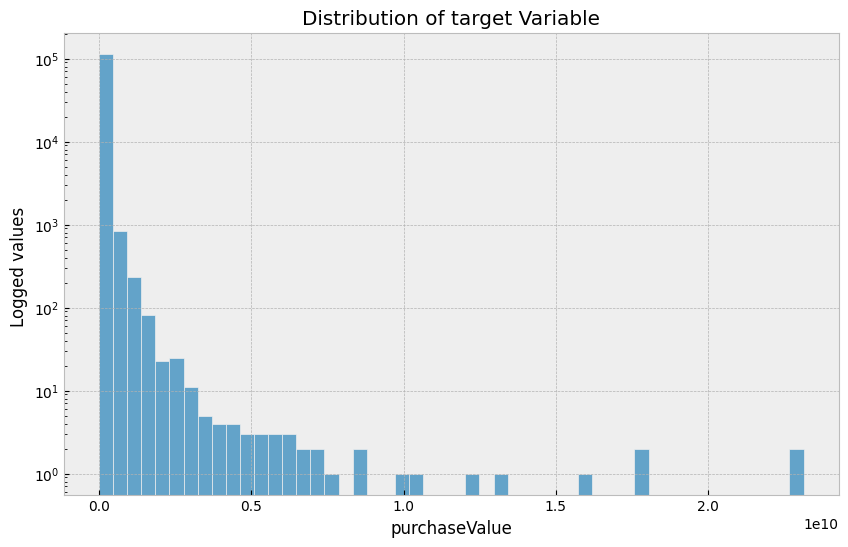

Skewness of the full purchaseValue column:- 53.907906319952396
Fraction of sessions with no purchase:- 0.7932737474466269


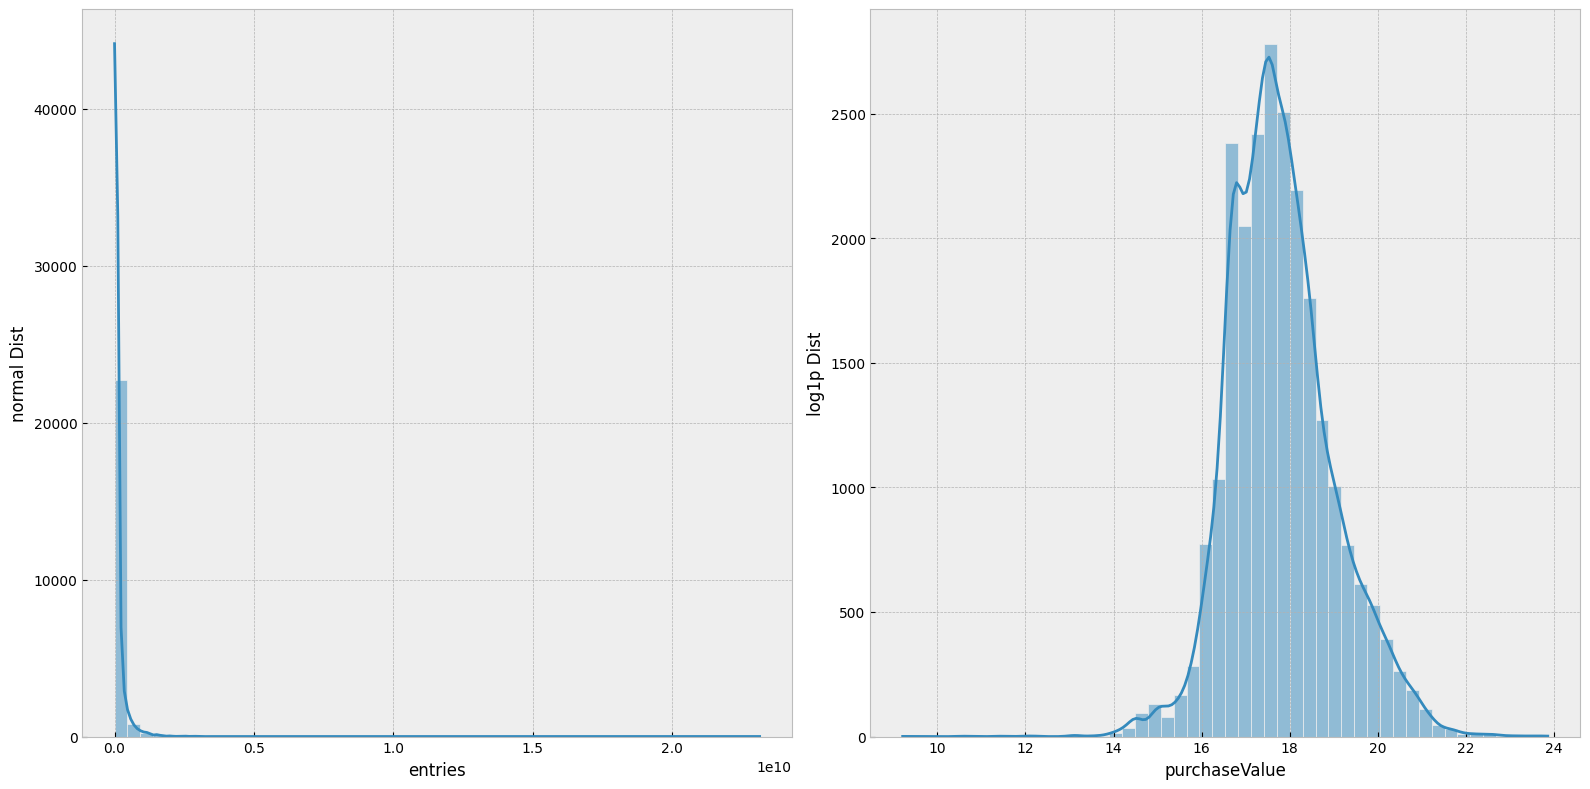

Skewness of non-zero purchases is 26.369475671210814


In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(train_df2["purchaseValue"],bins=50)
plt.yscale('log') # Use a log scale on y-axis to see the non-zero values
plt.title("Distribution of target Variable")
plt.ylabel("Logged values ")
plt.show()

print("Skewness of the full purchaseValue column:-",train_df2["purchaseValue"].skew())
print("Fraction of sessions with no purchase:-", (train_df2["purchaseValue"]==0).sum()/train_df2.shape[0])


 # Non zero 
nonZero = train_df2[train_df2["purchaseValue"]>0]["purchaseValue"]
fix,axes = plt.subplots(1,2,figsize=(16,8))
# axes = ax.flatten()

sns.histplot(nonZero, ax=axes[0],bins=50,kde=True)
axes[0].set_xlabel("entries")
axes[0].set_ylabel("normal Dist")
sns.histplot(np.log1p(nonZero), ax=axes[1], bins=50,kde=True)
axes[1].set_ylabel("log1p Dist")
plt.tight_layout()
plt.show()
print("Skewness of non-zero purchases is", nonZero.skew())

## 3.1 Univariate Analysis

## 3.1.1 Numerical Data

### 3.1.1.1 Descriptive stats

In [17]:
train_df2.describe()

purchaseValue     userId  gclIdPresent  sessionNumber  \
count        116,023.00 116,023.00    116,023.00     116,023.00   
mean      26,563,930.08  61,094.36          0.04           2.69   
min                0.00       0.00          0.00           1.00   
25%                0.00  30,603.50          0.00           1.00   
50%                0.00  61,014.00          0.00           1.00   
75%                0.00  91,616.50          0.00           2.00   
max   23,129,500,000.00 122,276.00          1.00         447.00   
std      205,182,527.15  35,240.76          0.19          10.45   

       totals.visits        sessionId  trafficSource.adwordsClickInfo.page  \
count     116,023.00       116,023.00                             4,281.00   
mean            1.00 1,493,429,019.85                                 1.02   
min             1.00 1,470,035,457.00                                 1.00   
25%             1.00 1,480,065,578.50                                 1.00   
50%             1.00 1,491,646,341.00                                 1.00   
75%             1.00 1,505,078,741.00                                 1.00   
max             1.00 1,525,156,795.00                                 5.00   
std             0.00    15,287,980.11                                 0.17   

       pageViews  locationZone  totals.bounces                           date  \
count 116,015.00    116,023.00       47,148.00                         116023   
mean        8.41          8.00            1.00  2017-04-28 05:57:49.122501888   
min         1.00          8.00            1.00            2016-08-01 00:00:00   
25%         1.00          8.00            1.00            2016-11-25 00:00:00   
50%         2.00          8.00            1.00            2017-04-08 00:00:00   
75%        10.00          8.00            1.00            2017-09-10 00:00:00   
max       469.00          8.00            1.00            2018-04-30 00:00:00   
std        14.34          0.00            0.00                            NaN   

       totalHits  new_visits        day  day_of_week      month    quarter  \
count 116,023.00   80,518.00 116,023.00   116,023.00 116,023.00 116,023.00   
mean       10.61        1.00      15.69         2.69       6.93       2.64   
min         1.00        1.00       1.00         0.00       1.00       1.00   
25%         1.00        1.00       8.00         1.00       4.00       2.00   
50%         2.00        1.00      16.00         3.00       8.00       3.00   
75%        12.00        1.00      23.00         4.00      10.00       4.00   
max       500.00        1.00      31.00         6.00      12.00       4.00   
std        19.63        0.00       8.73         1.91       3.61       1.17   

       day_of_month       year  day_of_year  dayofyear  weekofyear       hour  
count    116,023.00 116,023.00   116,023.00 116,023.00  116,023.00 116,023.00  
mean          15.69   2,016.79       195.59     195.59       28.25      12.77  
min            1.00   2,016.00         1.00       1.00        1.00       0.00  
25%            8.00   2,016.00        92.00      92.00       14.00       7.00  
50%           16.00   2,017.00       215.00     215.00       31.00      14.00  
75%           23.00   2,017.00       296.00     296.00       42.00      19.00  
max           31.00   2,018.00       366.00     366.00       52.00      23.00  
std            8.73       0.64       110.15     110.15       15.62       7.01

#### The purchaseValue is heavily skewed. Its mean is very high. its median (50th percentile) is zero.

### Variance

In [18]:
train_df2[columns["num_cols"]].var().sort_values()

totals.visits                                              0.00
new_visits                                                 0.00
totals.bounces                                             0.00
locationZone                                               0.00
trafficSource.adwordsClickInfo.page                        0.03
gclIdPresent                                               0.04
year                                                       0.41
quarter                                                    1.37
day_of_week                                                3.66
month                                                     13.01
hour                                                      49.08
day                                                       76.19
day_of_month                                              76.19
sessionNumber                                            109.24
pageViews                                                205.78
totalHits                               


- **new_visits, totals.bounces, totals.visits, and locationZone**: can be dropped for having  unique vals

- also **trafficSource.adwordsClickInfo.page, gclIdPresent** :- can be dropped for having very low variance.

- 3 cols have very high varince **userId, sessionId, and purchaseValue**, they are not good for modeling as they have unique and constant values

- rest cols are useful for modeling

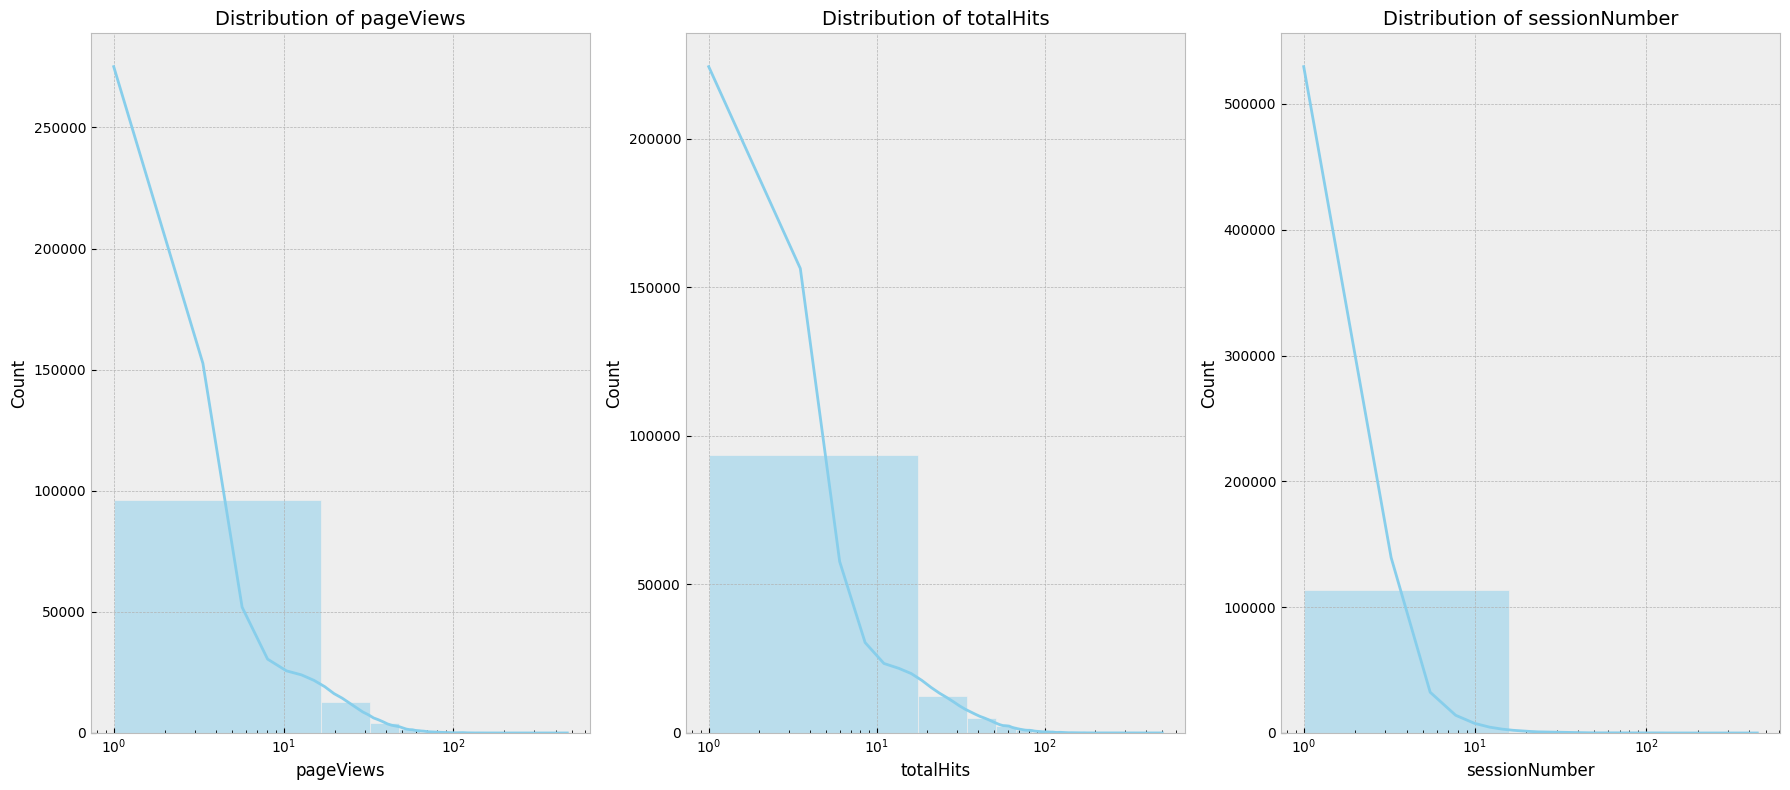

In [19]:
features_to_plot = ['pageViews', 'totalHits', 'sessionNumber']

plt.figure(figsize=(18, 8))

for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.histplot(train_df2[feature].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xscale('log')

plt.tight_layout()
plt.show()

- All three features are extremly skewed, most of sessions have very low values
- from sessionNumber grapgh we can see that large portion of traffic comes from first time**

### Box plots for the columns with high variance

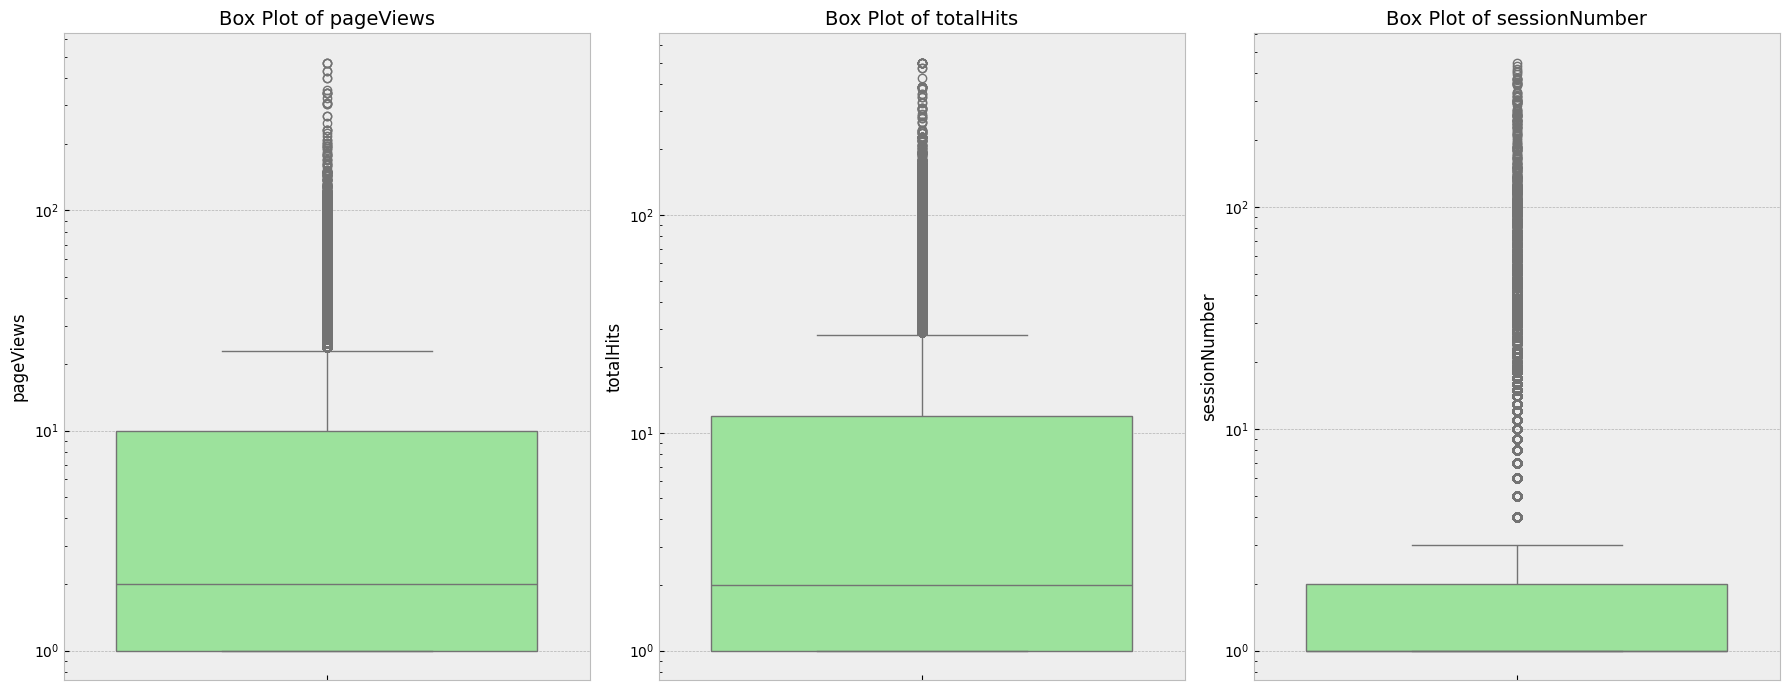

In [20]:
plt.figure(figsize=(18, 7))

for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=train_df2[feature].dropna(), color='lightgreen')
    plt.title(f'Box Plot of {feature}', fontsize=14)
    plt.yscale('log')
plt.tight_layout()
plt.show()

- Data is heavily concentrated at low values, means for all three features main box is compressed and at the bottom.
- many points are very far from main box so they are outliers.

### 3.1.1.2 Histogram plot

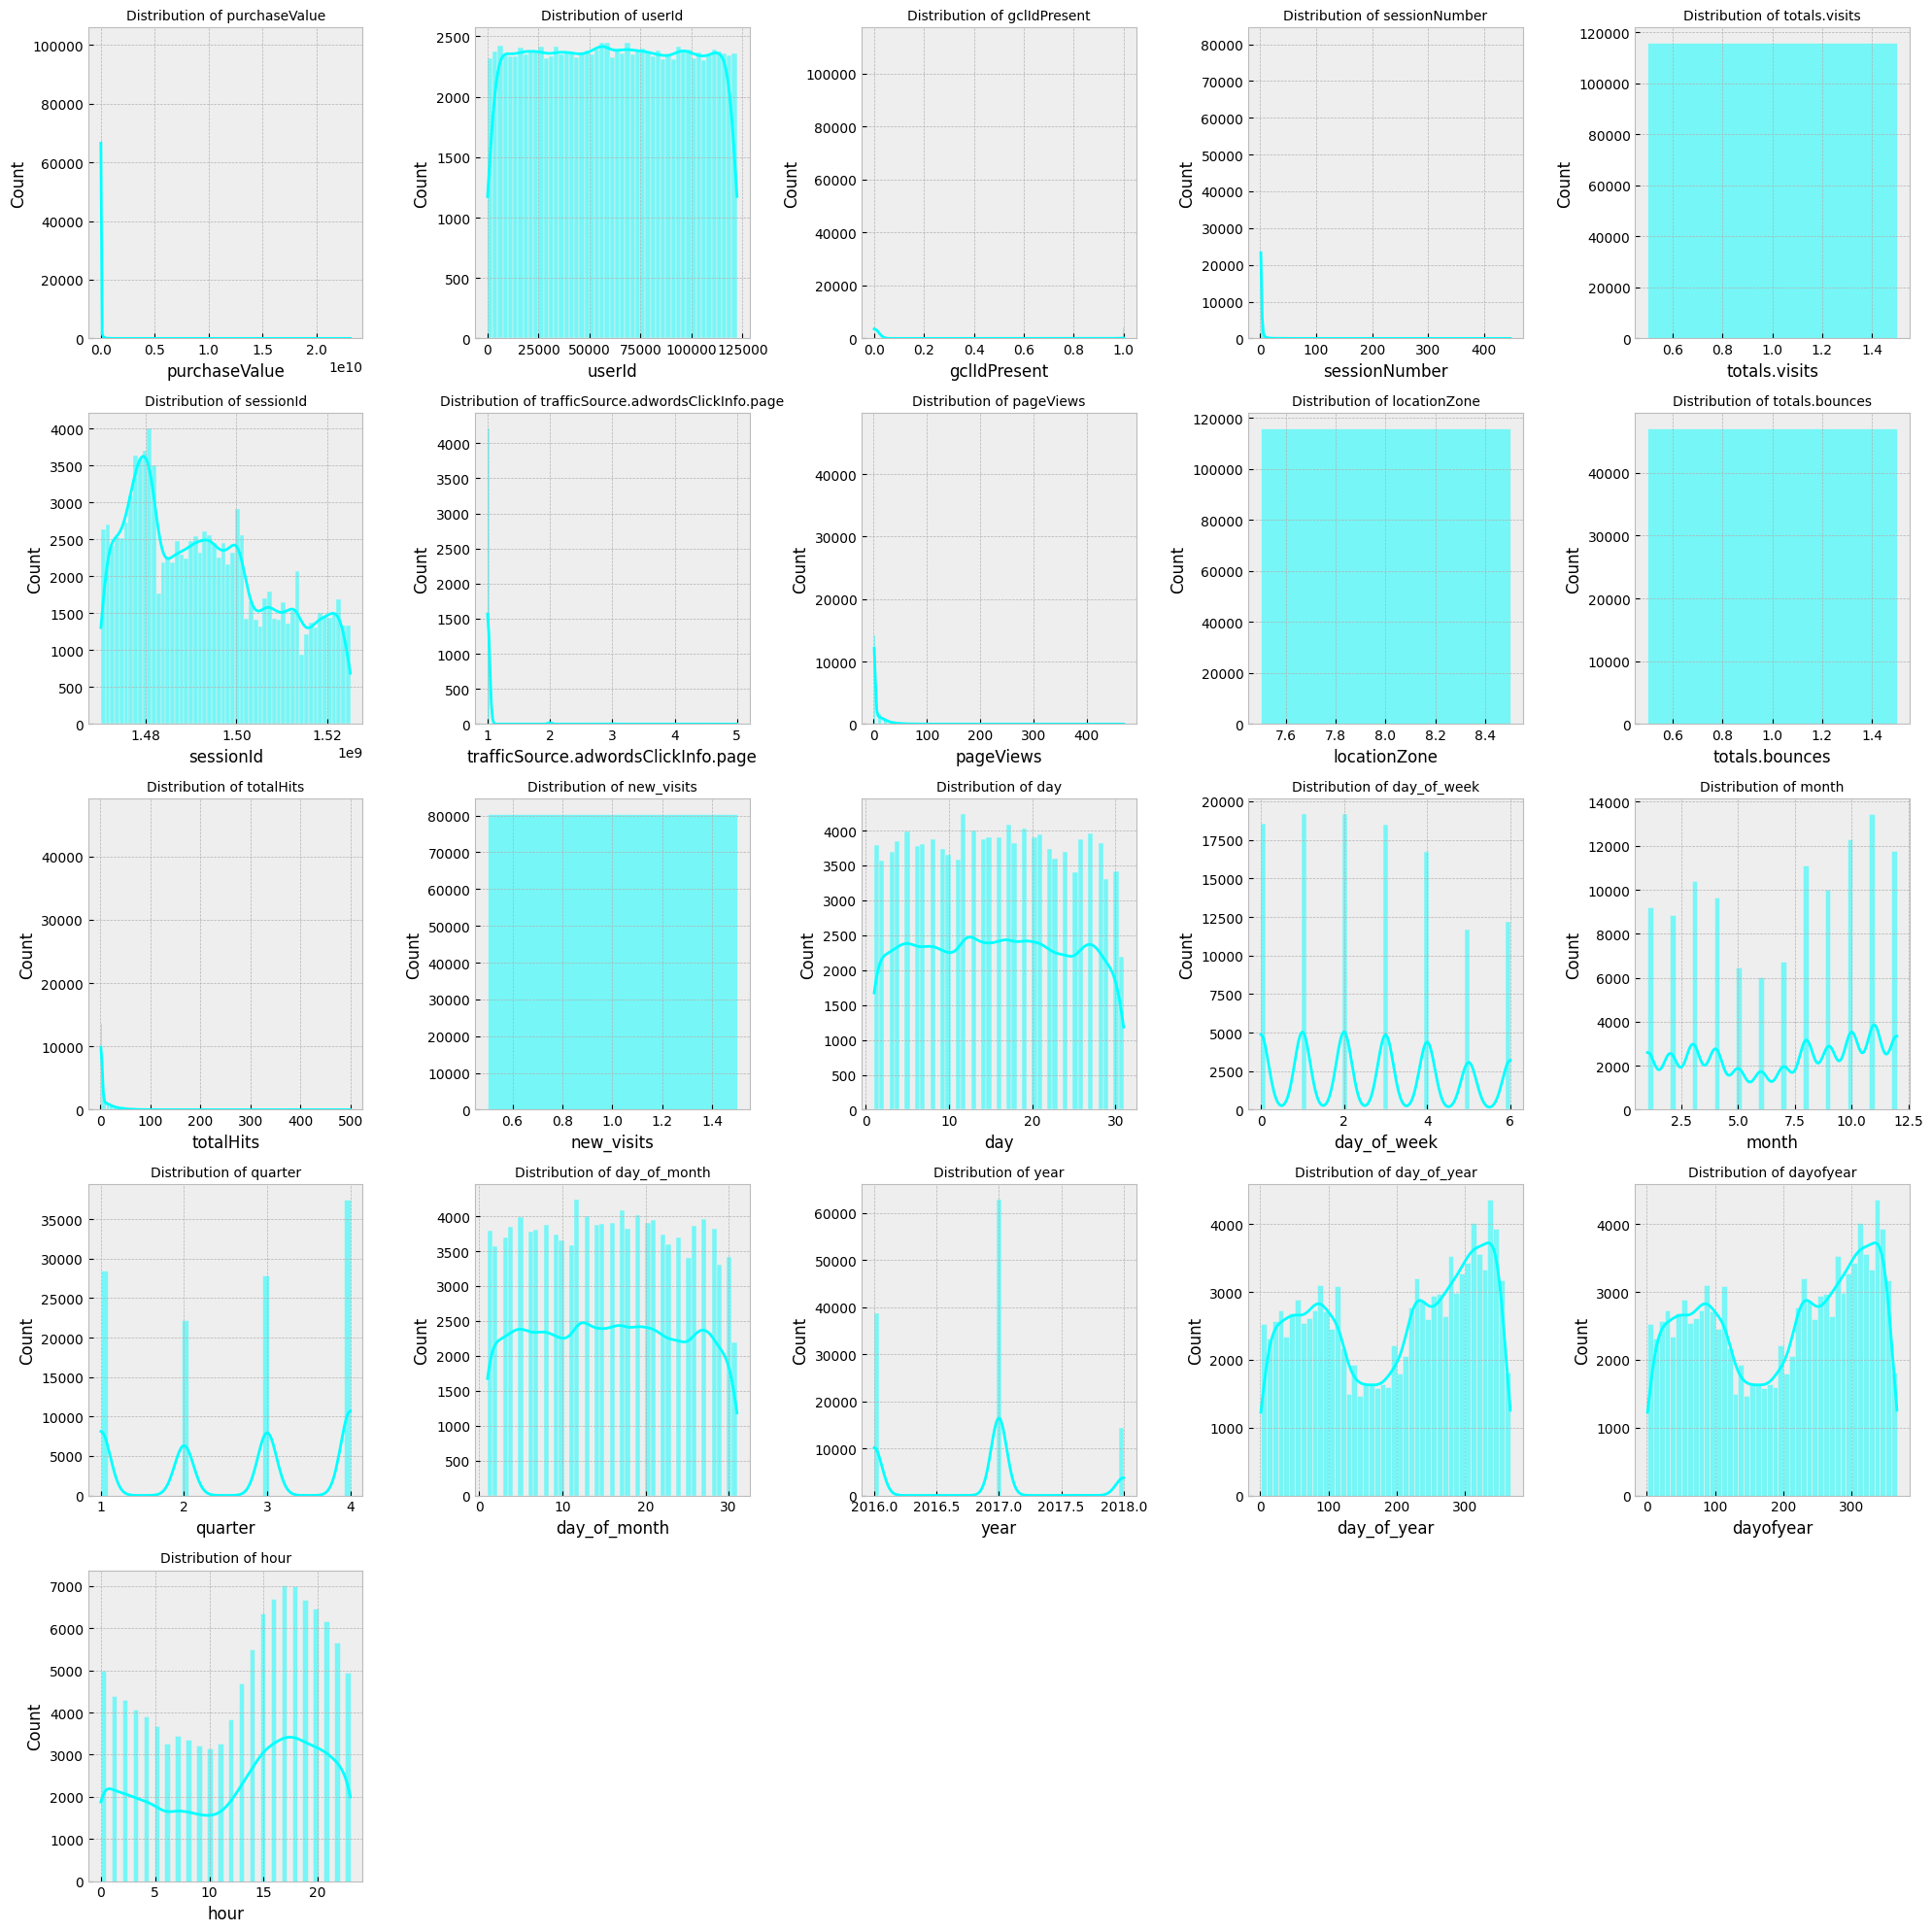

In [21]:
histplot_(train_df2, columns["num_cols"])

- purchaseValue: Extremely right-skewed.
- userId and sessionId: Uniformly distributed
- gclidPresent, new_visits, totals.visits, totals.bounces, locationZone: These are mostly binary.
- sessionNumber, pageViews, totalHits: These show a clear right-skewed distribution. 
- trafficSource.adwordsClickInfo.page: Sparse and mostly centered around 1.
- day, month, hour: These temporal features are more evenly distributed. 
- year: The distribution seems oddly concentrated around one or two specific years. 

### 3.1.1.3 show Boxplots

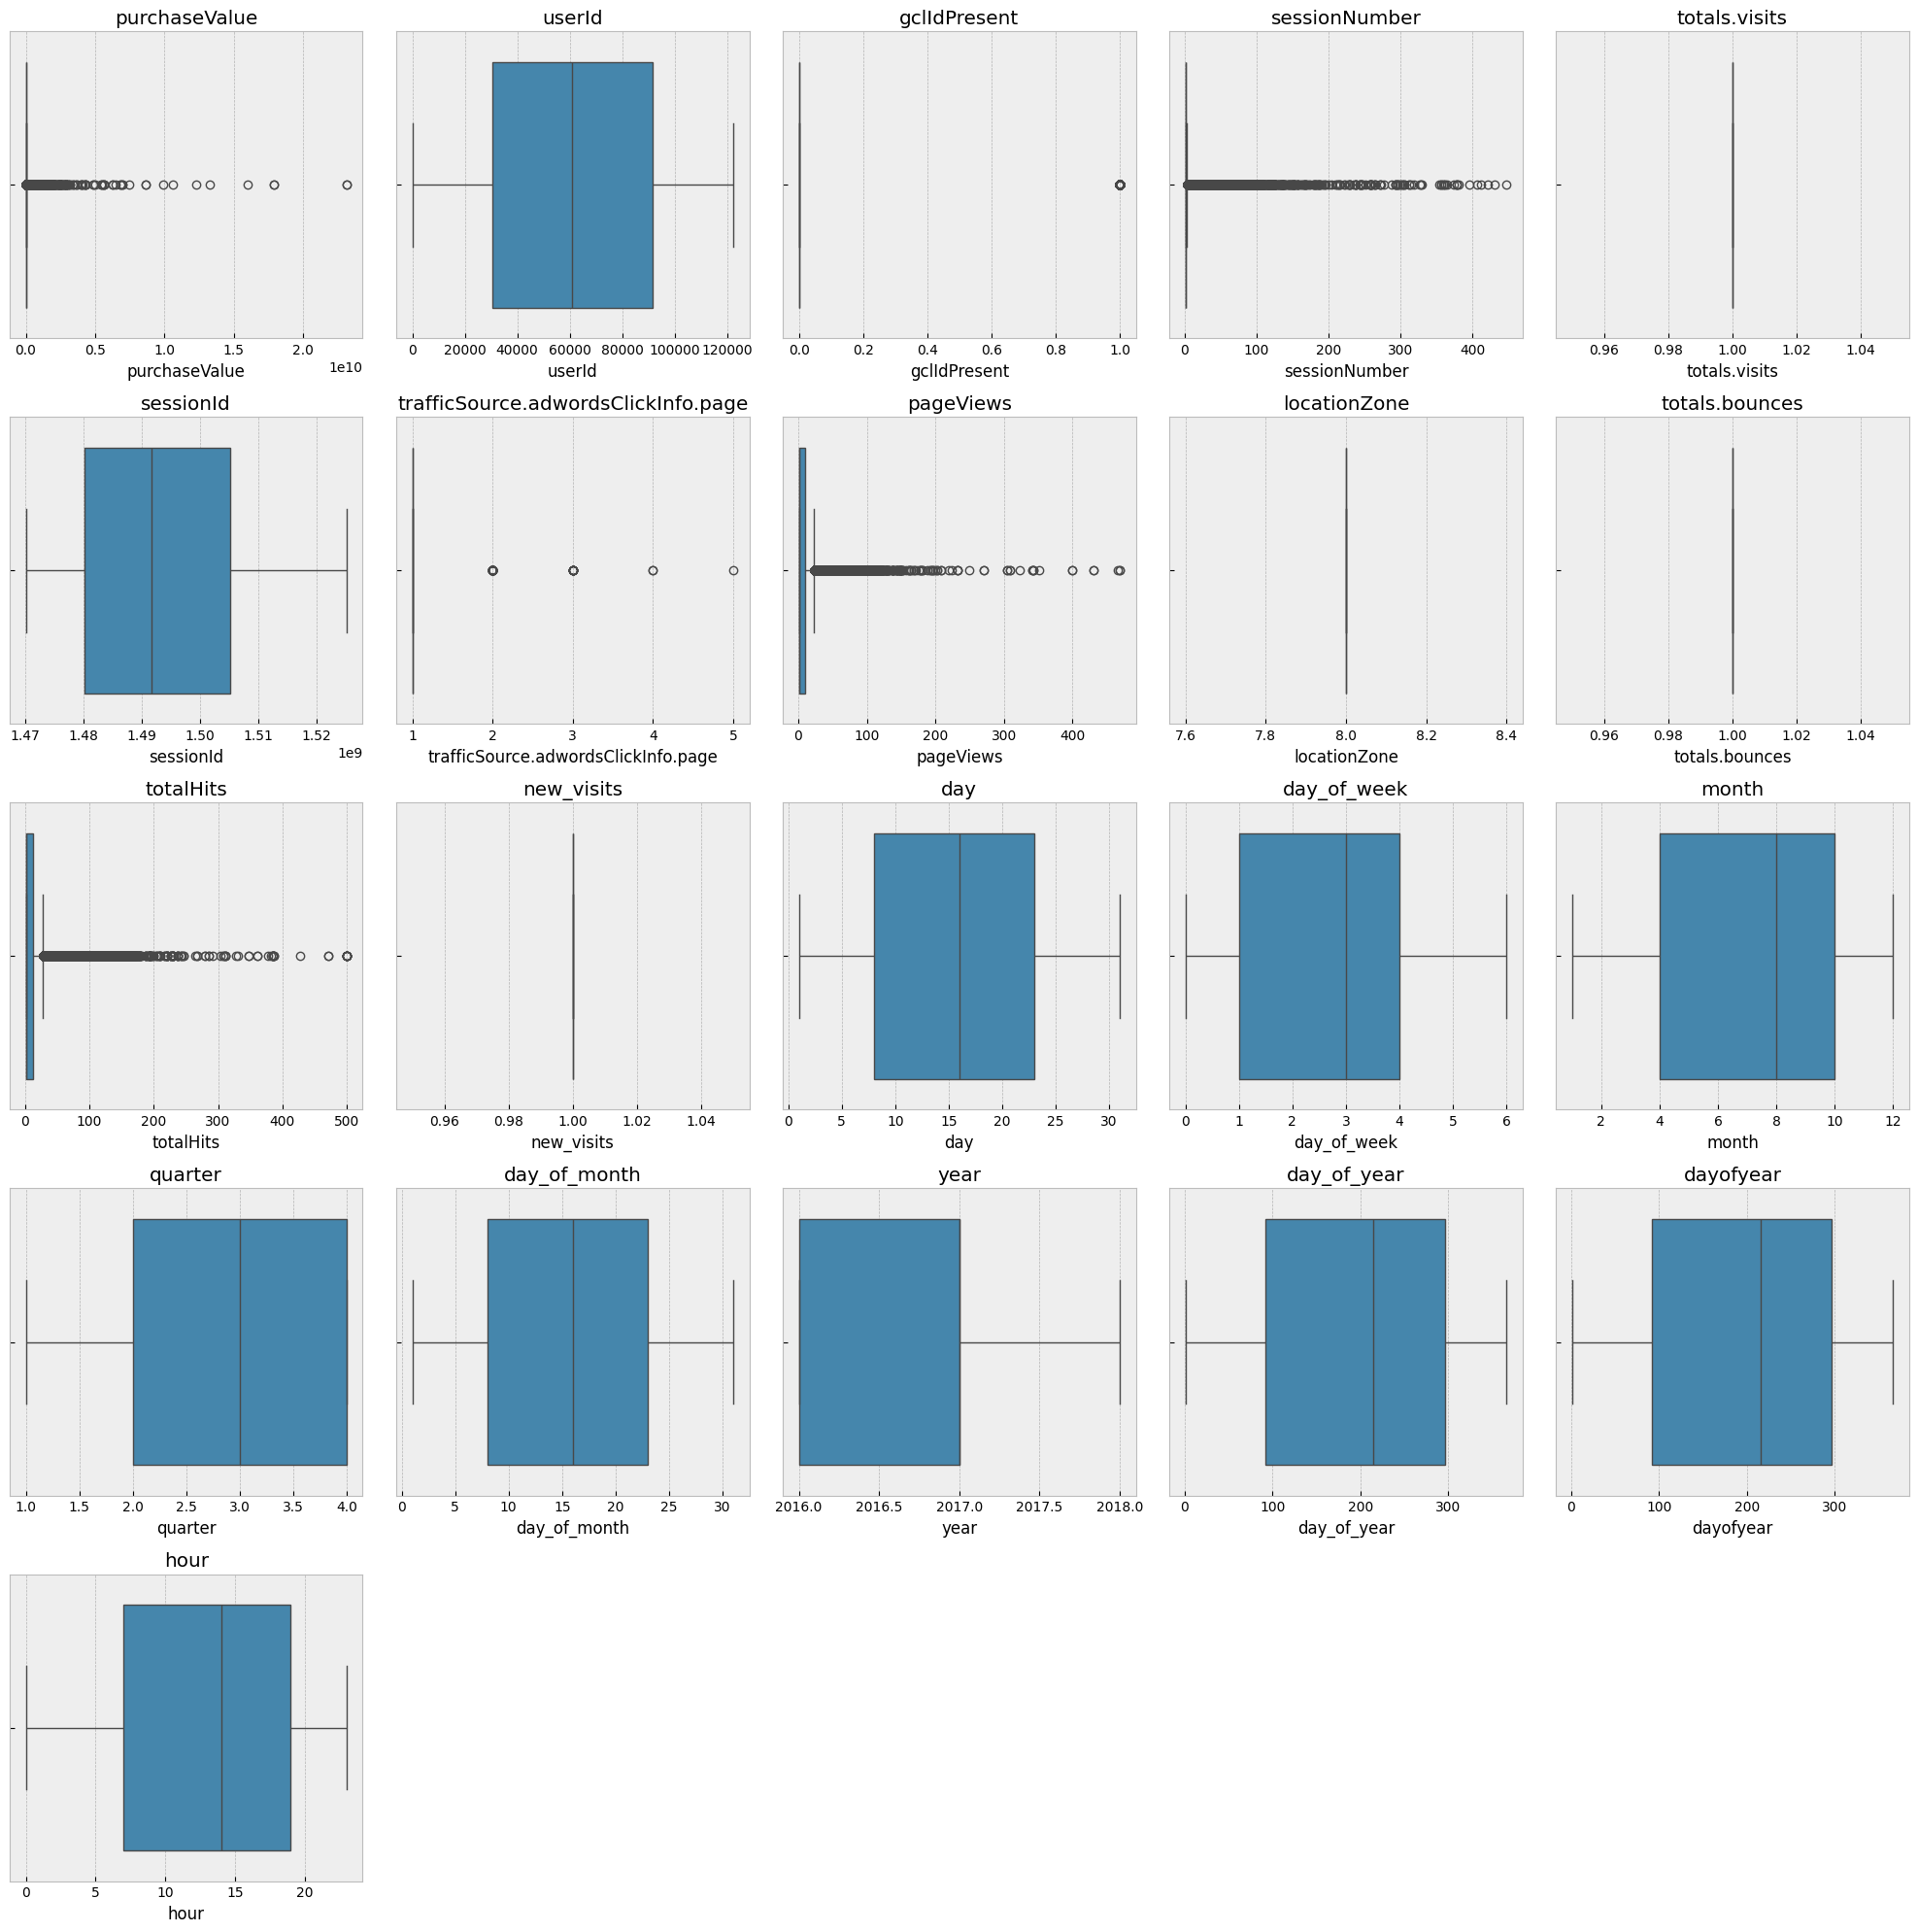

In [22]:
show_boxplot(train_df2, columns["num_cols"])

- purchaseValue: Strong presence of extreme outliers.
- sessionNumber, pageViews, totalHits, trafficSource.adwordsClickInfo.page: All have significant outliers. 
- sessionId and userId: These behave as expected.
- totals.visits, totals.bounces, locationZone, new_visits: Nearly constant values or binary.
- day, month, hour: Fairly even spread
- year: Very narrow range of values

### 3.1.1.4 Column wise distribution

#### All the columns

-  **Bars** show the values distribution
-  **line** show the distribution of purchaseValue among the entries

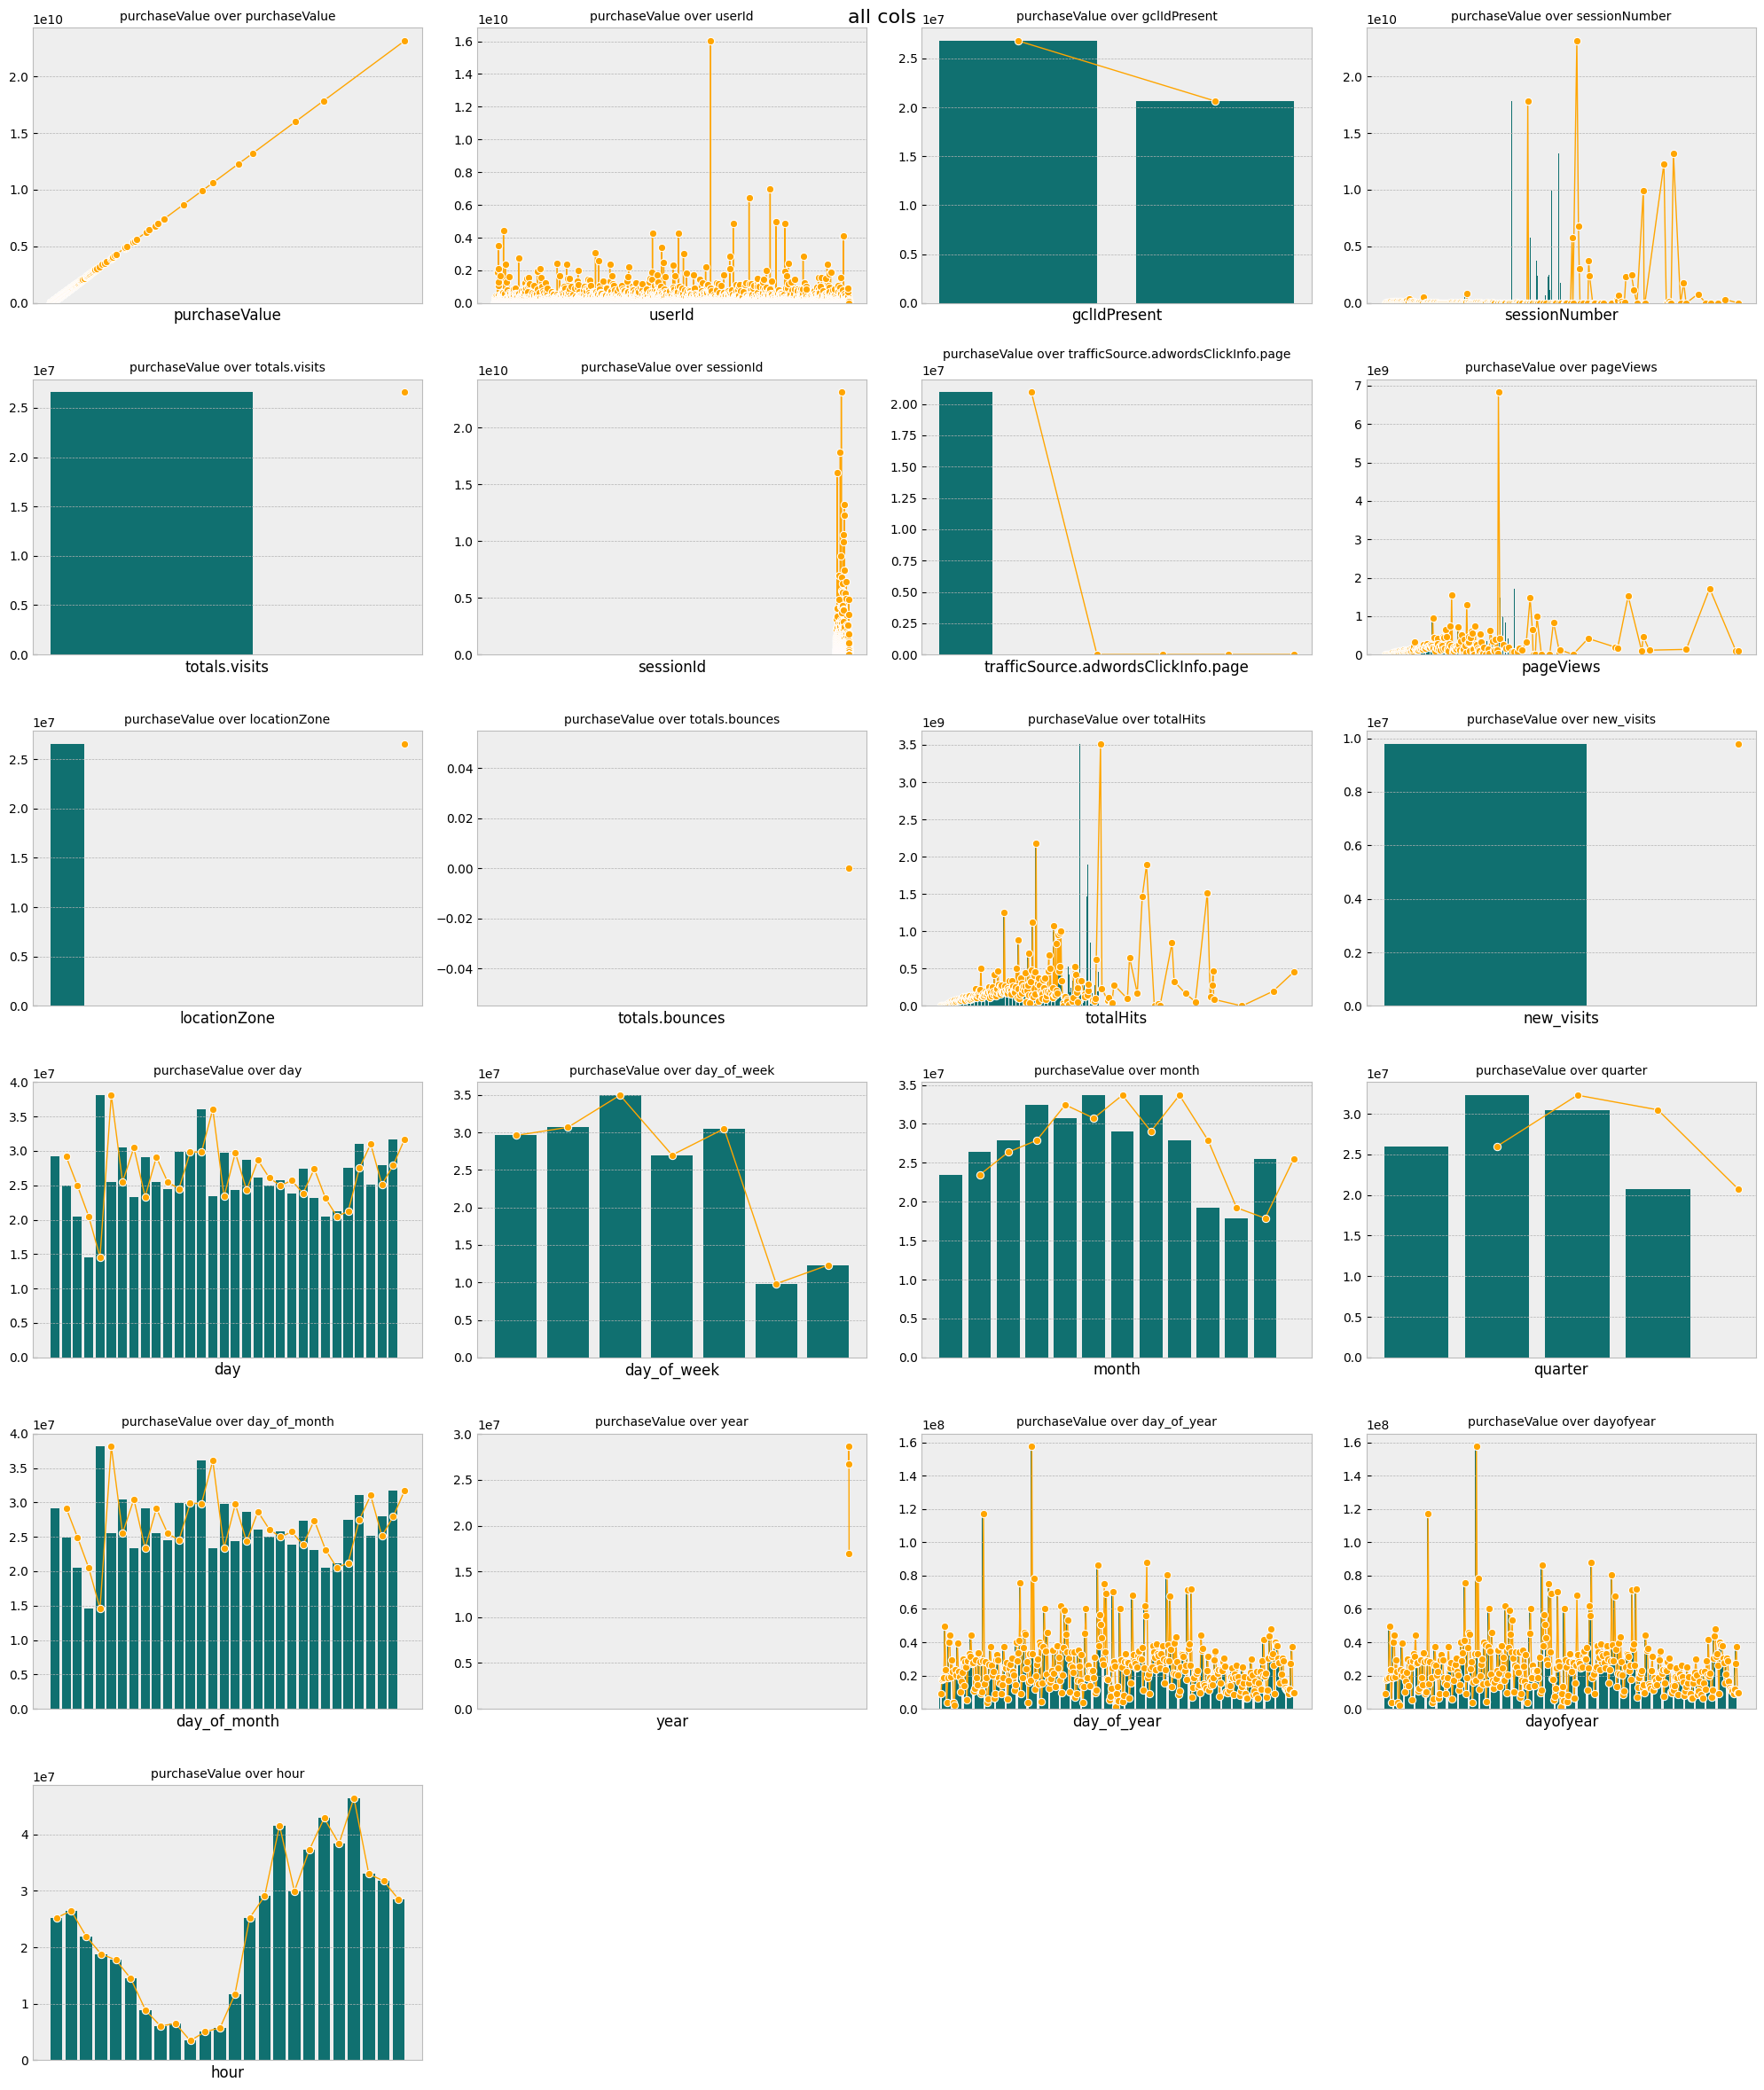

In [23]:
column_wise_distribution(train_df2,columns["num_cols"],"purchaseValue","all cols")

### 3.1.1.5 Violin plot

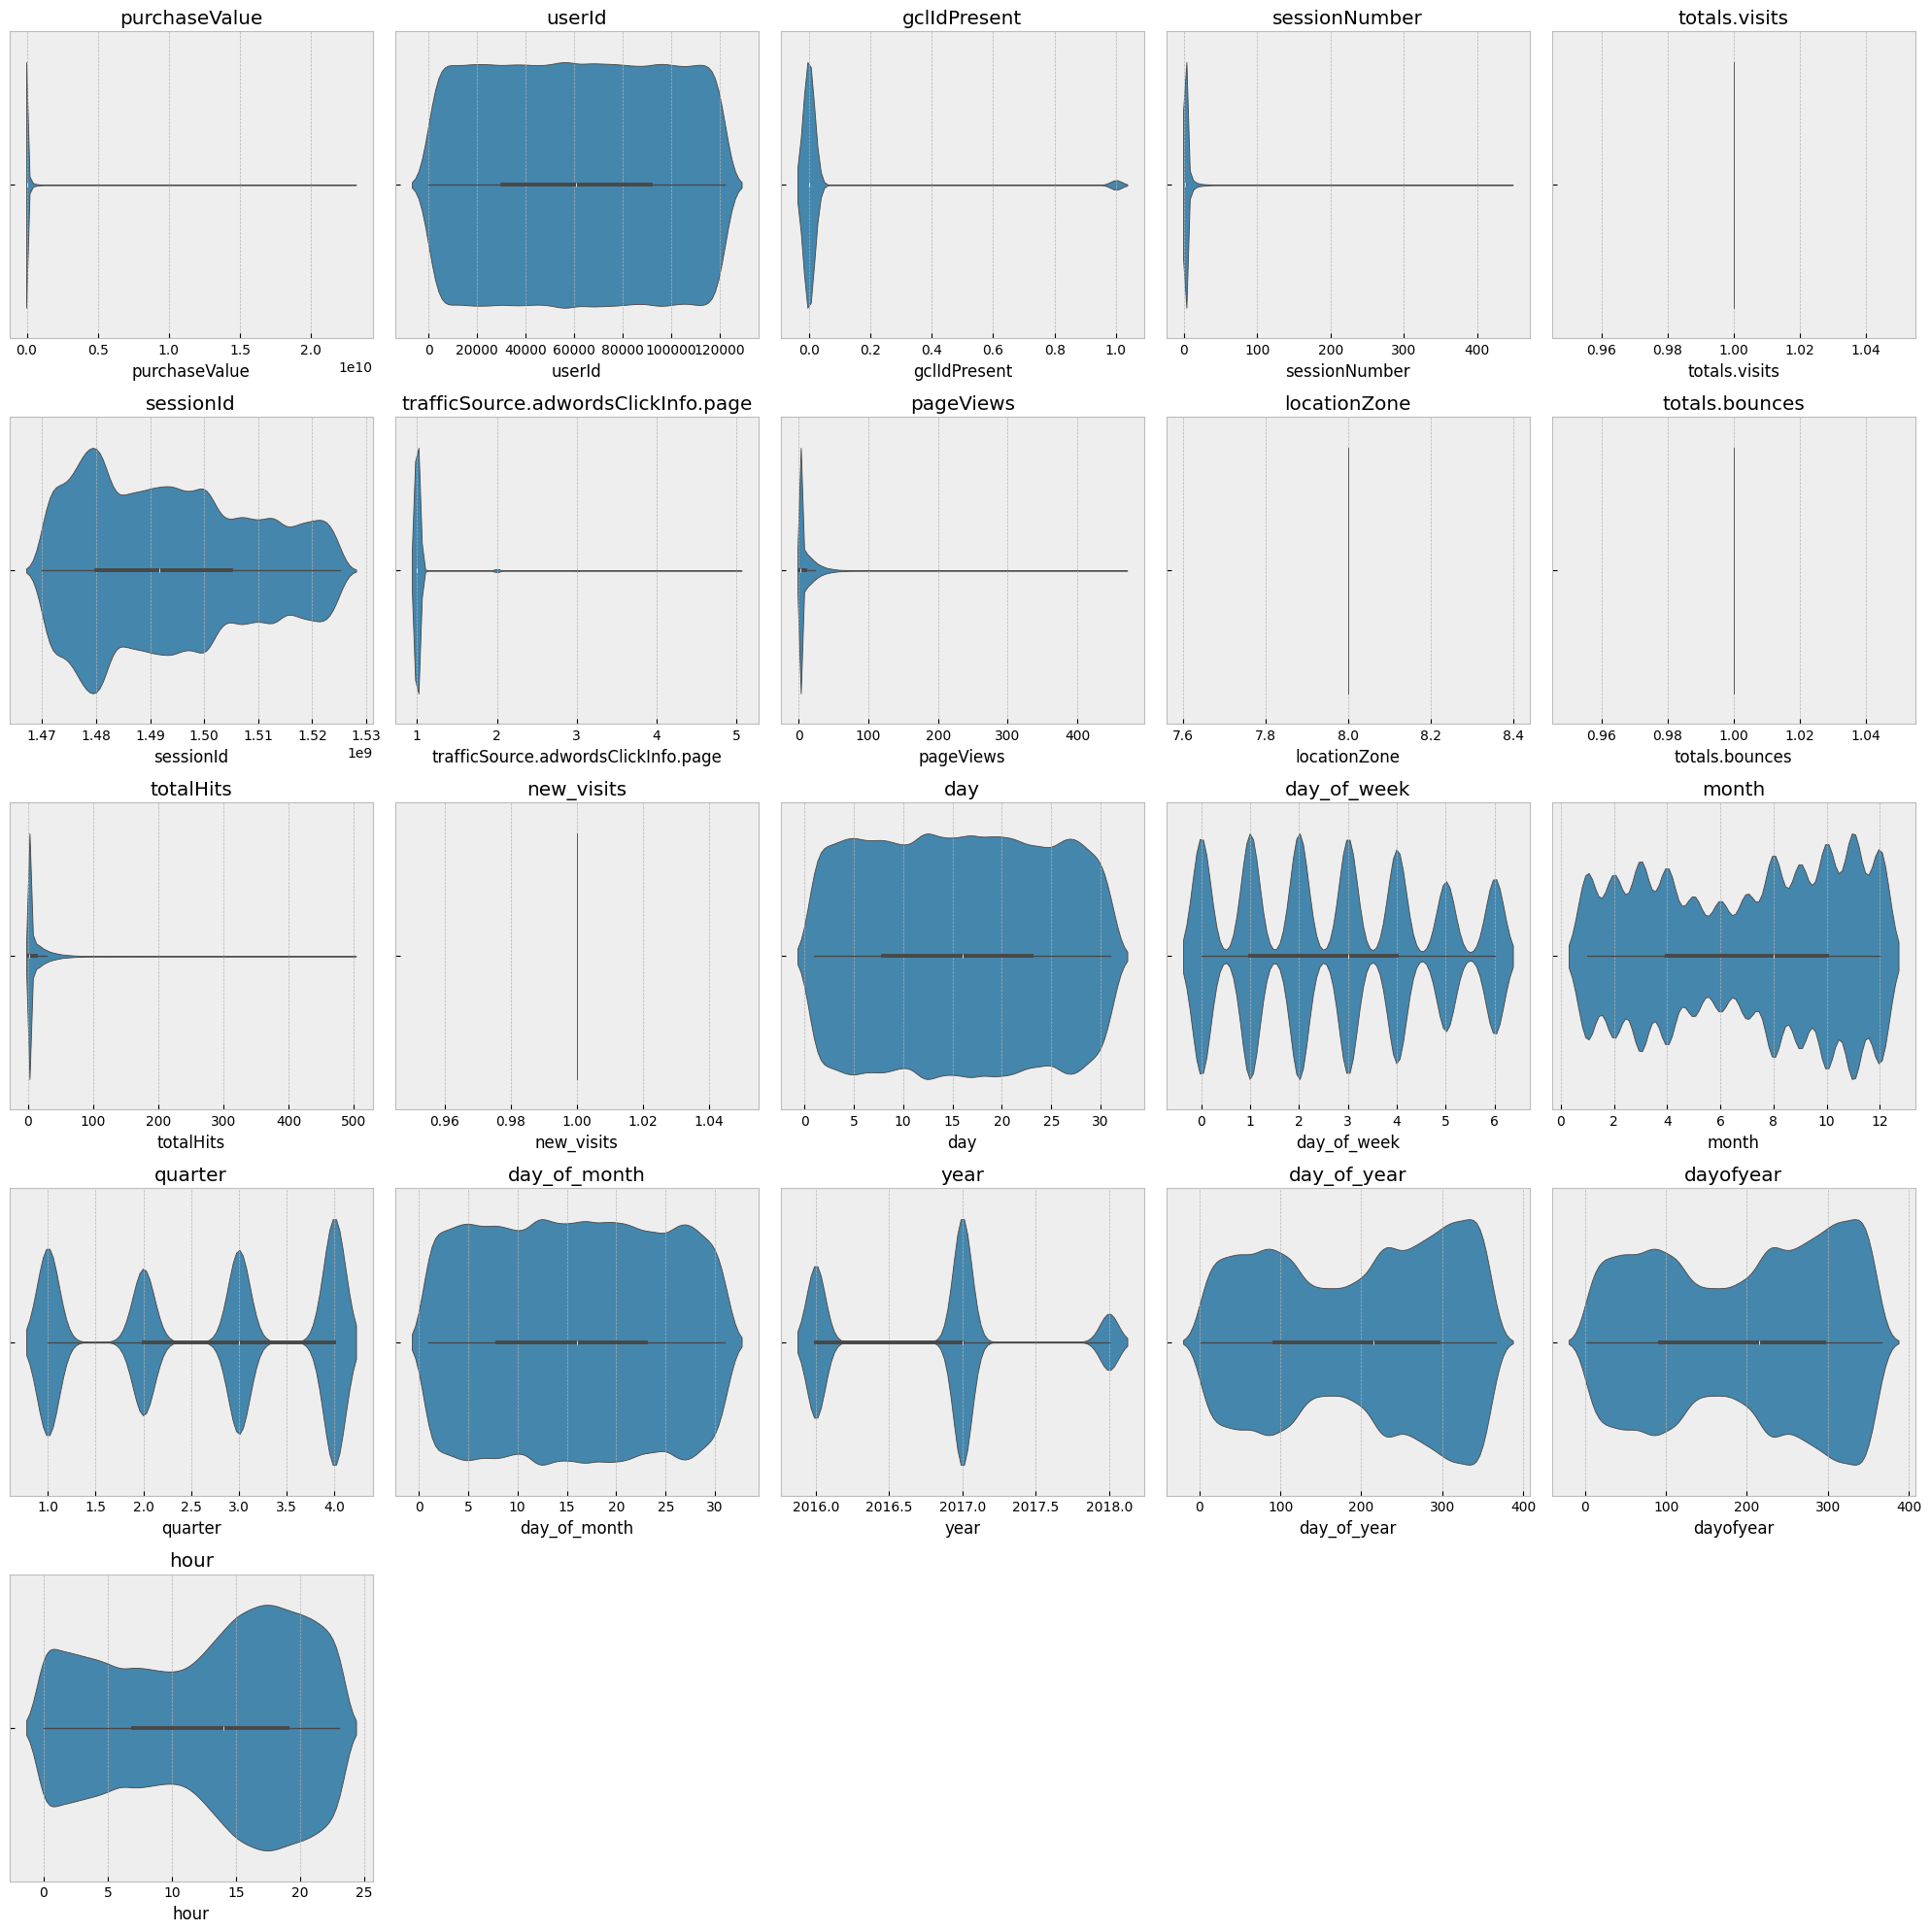

In [24]:
show_violinplot(train_df2,columns["num_cols"])

### 3.1.1.6 drop columns with null values

In [25]:
most_na_cols =drop_missing_cols(train_df2, test_df2,.7)
print("columns with null values are ",most_na_cols)
cols_to_drop = ["trafficSource.adContent","trafficSource.keyword","trafficSource.adwordsClickInfo.page","trafficSource.adwordsClickInfo.slot","trafficSource.adwordsClickInfo.adNetworkType","trafficSource.referralPath"]

columns with null values are  ['trafficSource.isTrueDirect', 'trafficSource.adContent', 'trafficSource.keyword', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.page', 'trafficSource.referralPath', 'totals.bounces', 'new_visits']


In [26]:
def categorize_search_term(term):
    if pd.isna(term):
        return 'unknown'
    term = str(term).lower()

    if any(k in term for k in ['youtube', 'you tube', 'yt', 'youtub']):
        return 'youtube merch'
    elif any(k in term for k in ['google store', 'google shop', 'google merch', 'google merchandise']):
        return 'google store'
    elif any(k in term for k in ['tshirt', 't-shirt', 't shirt']):
        return 't-shirt'
    elif 'sticker' in term:
        return 'sticker'
    elif 'mug' in term:
        return 'mug'
    elif 'pen' in term:
        return 'stationery'
    elif 'hoodie' in term or 'jacket' in term:
        return 'clothing'
    elif 'lamp' in term:
        return 'lamp'
    elif any(k in term for k in ['buy', 'purchase', 'shop', 'store']):
        return 'shopping intent'
    elif 'google' in term:
        return 'general google'
    elif 'merchandise' in term:
        return 'generic merch'
    else:
        return 'other'

In [27]:
# trafficSource.adwordsClickInfo.slot
train_df2['trafficSource.adwordsClickInfo.slot']=train_df2['trafficSource.adwordsClickInfo.slot'].fillna('Not_Ad')
test_df2['trafficSource.adwordsClickInfo.slot']=test_df2['trafficSource.adwordsClickInfo.slot'].fillna('Not_Ad')

# trafficSource.keyword
train_df2['trafficSource.keyword'] = train_df2['trafficSource.keyword'].apply(categorize_search_term)
test_df2['trafficSource.keyword'] = test_df2['trafficSource.keyword'].apply(categorize_search_term)

# trafficSource.adwordsClickInfo.page
train_df2['trafficSource.adwordsClickInfo.page'] = train_df2['trafficSource.adwordsClickInfo.page'].fillna(0).astype(int)
test_df2['trafficSource.adwordsClickInfo.page'] = test_df2['trafficSource.adwordsClickInfo.page'].fillna(0).astype(int)
# trafficSource.adwordsClickInfo.adNetworkType
train_df2["trafficSource.adwordsClickInfo.adNetworkType"]=train_df2['trafficSource.adwordsClickInfo.adNetworkType'].fillna('Not_Ad')
test_df2["trafficSource.adwordsClickInfo.adNetworkType"]=test_df2['trafficSource.adwordsClickInfo.adNetworkType'].fillna('Not_Ad')

train_df2["trafficSource.adwordsClickInfo.isVideoAd"] = train_df2["trafficSource.adwordsClickInfo.isVideoAd"].fillna(True)
test_df2["trafficSource.adwordsClickInfo.isVideoAd"] = test_df2["trafficSource.adwordsClickInfo.isVideoAd"].fillna(True)


C:\Users\KuldeepChavda\AppData\Local\Temp\ipykernel_18360\2872925594.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df2["trafficSource.adwordsClickInfo.isVideoAd"] = train_df2["trafficSource.adwordsClickInfo.isVideoAd"].fillna(True)
C:\Users\KuldeepChavda\AppData\Local\Temp\ipykernel_18360\2872925594.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df2["trafficSource.adwordsClickInfo.isVideoAd"] = test_df2["trafficSource.adwordsClickInfo.isVideoAd"].fillna(True)


trafficSource.adContent,"trafficSource.keyword": higher cardinality, and large number of NaN,trafficSource.referralPath

trafficSource.adwordsClickInfo.slot  : large amount of NaN

trafficSource.adwordsClickInfo.adNetworkType: ads are not the focus

In [28]:
train_df3, test_df3 = train_df2.copy(), test_df2.copy()
columns = get_int_str_cols(train_df3)

Distribution correct: False
Total cols: 61 
Numerical: 21 
Categorical: 39 
time cols 0


In [29]:
train_df3.shape, test_df3.shape

((116023, 61), (29006, 60))

In [30]:
columns = get_int_str_cols(train_df3)

Distribution correct: False
Total cols: 61 
Numerical: 21 
Categorical: 39 
time cols 0


In [31]:
remaining_cols = [
    "trafficSource.isTrueDirect",
    "trafficSource.adwordsClickInfo.isVideoAd",
    "totals.bounces",
    "new_visits",
        "gclIdPresent"

]

for i in remaining_cols:
    train_df3[i]  = train_df3[i].fillna(0).astype(int)
    test_df3[i]  = test_df3[i].fillna(0).astype(int)
    
columns= get_int_str_cols(train_df3)

Distribution correct: False
Total cols: 61 
Numerical: 23 
Categorical: 37 
time cols 0


In [32]:
train_df3[["totals.bounces","new_visits","gclIdPresent"]]

totals.bounces  new_visits  gclIdPresent
0                    1           1             0
1                    1           1             0
2                    0           0             0
3                    1           1             0
4                    0           1             0
...                ...         ...           ...
116018               0           1             0
116019               1           1             0
116020               1           0             0
116021               0           1             0
116022               0           0             0

[116023 rows x 3 columns]

### 3.1.1.7 unique entrie over the columns

In [33]:
for i in train_df3[columns["num_cols"]]:
    print(i,len(train_df3[i].unique()))

trafficSource.isTrueDirect 2
purchaseValue 6766
userId 100499
gclIdPresent 2
sessionNumber 230
totals.visits 1
sessionId 107379
trafficSource.adwordsClickInfo.isVideoAd 2
trafficSource.adwordsClickInfo.page 6
pageViews 176
locationZone 1
totals.bounces 2
totalHits 225
new_visits 2
day 31
day_of_week 7
month 12
quarter 4
day_of_month 31
year 3
day_of_year 366
dayofyear 366
hour 24


### 3.1.1.8 outliers information

In [34]:
import numpy as np
import pandas as pd

def get_outlier_info(df, columns):
    inliers_ = []
    outliers_ = []
    upper_bound = []
    lower_bound = []
    column_name = []

    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR = q3 - q1

        low_ = q1 - 1.5 * IQR
        upr_ = q3 + 1.5 * IQR

        inliers = np.array(df[i].apply(lambda x: low_ <= x <= upr_))
        total_inliers = inliers.sum()
        total_outliers = df.shape[0] - total_inliers

        upper_bound.append(upr_)
        lower_bound.append(low_)
        inliers_.append(total_inliers)
        outliers_.append(total_outliers)
        column_name.append(i)

    dict_ = {
        "column_name": column_name,
        "upper_bound": upper_bound,
        "lower_bound": lower_bound,
        "total_inliers": inliers_,
        "total_outliers": outliers_
    }

    return pd.DataFrame(dict_)


In [35]:
columns_for_iqr = train_df3.select_dtypes("number").columns 
get_outlier_info(train_df3, columns_for_iqr)


column_name      upper_bound  \
0                 trafficSource.isTrueDirect             2.50   
1                              purchaseValue             0.00   
2                                     userId       183,136.00   
3                               gclIdPresent             0.00   
4                              sessionNumber             3.50   
5                              totals.visits             1.00   
6                                  sessionId 1,542,598,484.75   
7   trafficSource.adwordsClickInfo.isVideoAd             1.00   
8        trafficSource.adwordsClickInfo.page             0.00   
9                                  pageViews            23.50   
10                              locationZone             8.00   
11                            totals.bounces             2.50   
12                                 totalHits            28.50   
13                                new_visits             2.50   
14                                       day            45.50   
15                               day_of_week             8.50   
16                                     month            19.00   
17                                   quarter             7.00   
18                              day_of_month            45.50   
19                                      year         2,018.50   
20                               day_of_year           602.00   
21                                 dayofyear           602.00   
22                                weekofyear            84.00   
23                                      hour            37.00   

        lower_bound  total_inliers  total_outliers  
0             -1.50         116023               0  
1              0.00          92038           23985  
2        -60,916.00         116023               0  
3              0.00         111728            4295  
4             -0.50         101907           14116  
5              1.00         116023               0  
6  1,442,545,834.75         116023               0  
7              1.00         111742            4281  
8              0.00         111742            4281  
9            -12.50         103596           12427  
10             8.00         116023               0  
11            -1.50         116023               0  
12           -15.50         102869           13154  
13            -1.50         116023               0  
14           -14.50         116023               0  
15            -3.50         116023               0  
16            -5.00         116023               0  
17            -1.00         116023               0  
18           -14.50         116023               0  
19         2,014.50         116023               0  
20          -214.00         116023               0  
21          -214.00         116023               0  
22           -28.00         116023               0  
23           -11.00         116023               0

#### Columns with higher number of outliers are the ones to be oobserved and to learn from

## 3.1.2 Categorical Data

In [36]:
train_df3[columns["cat_cols"]].describe()


date
count                         116023
mean   2017-04-28 05:57:49.122501888
min              2016-08-01 00:00:00
25%              2016-11-25 00:00:00
50%              2017-04-08 00:00:00
75%              2017-09-10 00:00:00
max              2018-04-30 00:00:00


- Very high unique values: **geoNetwork.city, geoNetwork.region, geoNetwork.metro, trafficSource.keyword**
- valuable information column with manageable unique values: **deviceType, userChannel, geoNetwork.continent, browser, os**

<br><br/>
- Cols to drop: **socialEngagementType (Single Unique Value), device.operatingSystemVersion**
- Very High Unique Values (No information gain): **device.browserVersion,  device.mobileDeviceModel**
- High missing : **trafficSource.adContent, trafficSource.isTrueDirect, trafficSource.campaign, trafficSource.adwordsClickInfo.slot, trafficSource.adwordsClickInfo.isVideoAd**

### value counts visualization

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

def show_value_counts(df, columns_):
    warnings.filterwarnings("ignore", category=UserWarning)  # suppress font warnings

    num_plots = len(columns_)
    cols = 4  # number of subplots per row
    rows = math.ceil(num_plots / cols)
    
    fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = ax.flatten()

    for ind, col_ in enumerate(columns_):
        value_counts = df[col_].value_counts(normalize=True)
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[ind], color='lightseagreen')
        sns.lineplot(x=value_counts.index.astype(str), y=value_counts.values,ax=axes[ind], marker="o", color="orange",linewidth=2, markersize=1)
        
        axes[ind].set_title(col_, fontsize=10)
        axes[ind].set_ylabel("Proportion", fontsize=9)
        axes[ind].set_xlabel("Value", fontsize=9)
        axes[ind].tick_params(axis='x', labelrotation=90,bottom=False, labelsize=7)
        axes[ind].tick_params(axis='y', labelsize=8)
        axes[ind].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


    for i in range(num_plots, len(axes)):
        axes[i].axis("off")

    plt.tight_layout(h_pad=2.0)
    plt.show()


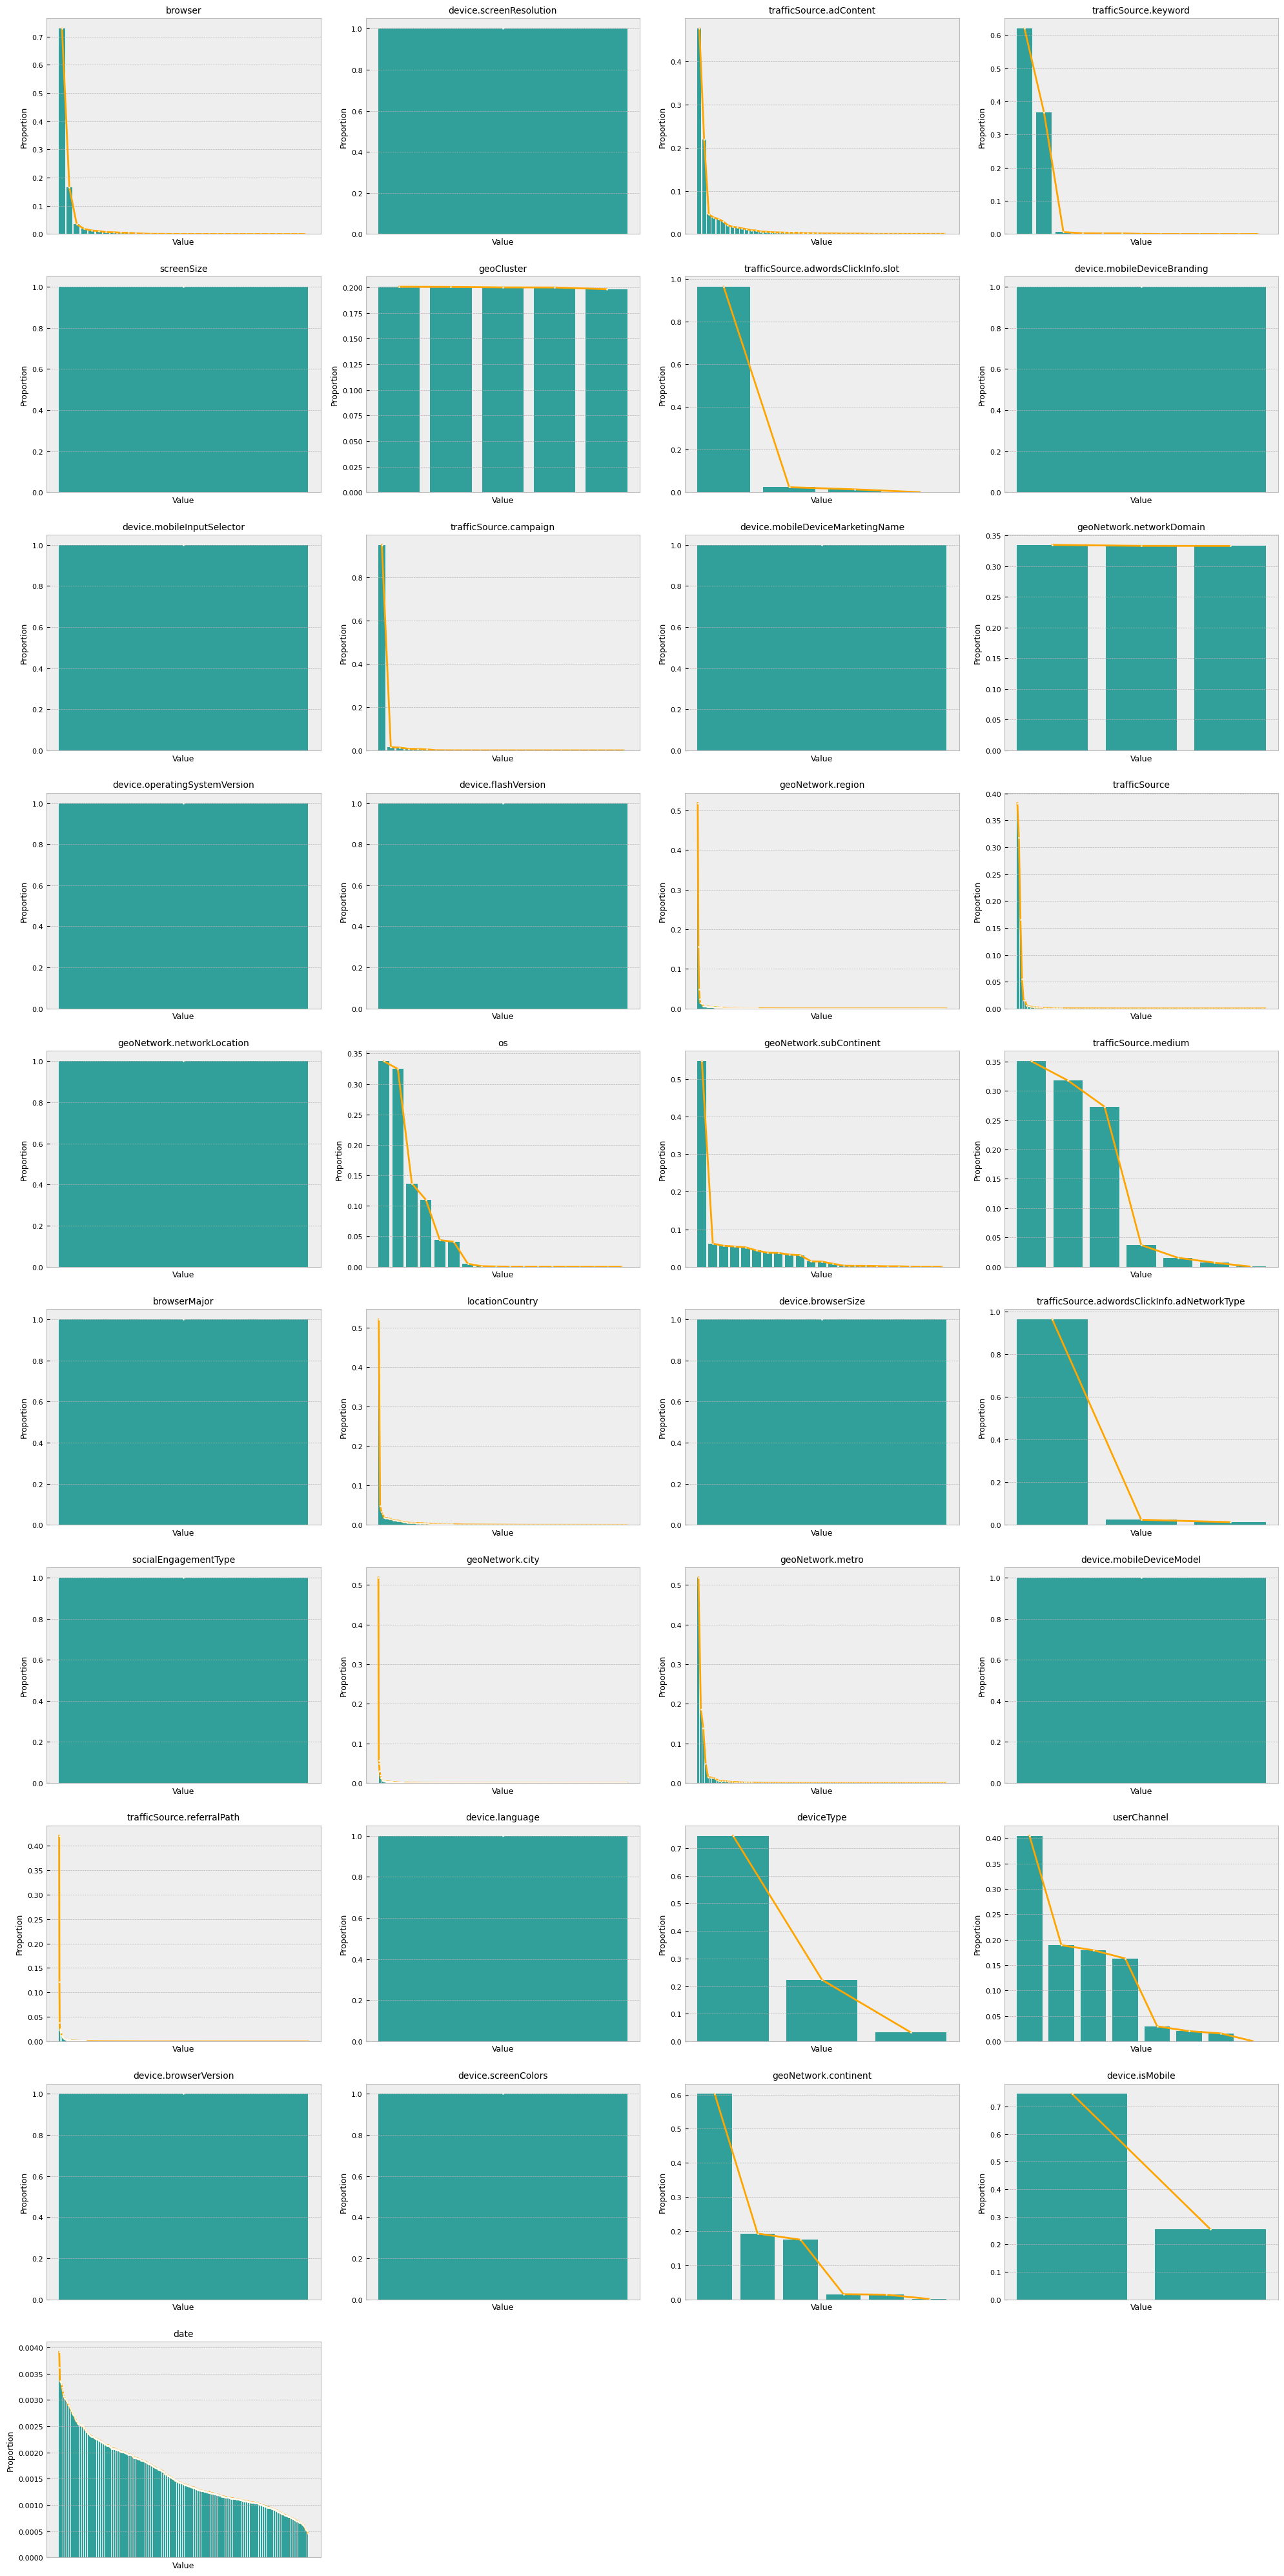

In [38]:
show_value_counts(train_df3, columns["cat_cols"])

- DeviceType: The majority of users access the site from desktop, followed by mobile.
- Operating System (OS): Windows and Macintosh dominate, with Android and iOS trailing.
- Browser: Chrome is the most widely used browser
- User Channel: Most traffic comes from Organic Search
- Traffic Medium: Organic and Referral mediums are the top sources of traffic.
- Ad Network Type: Google Search is the most common ad network type used.
- Continent: Users mainly come from Americas, Asia, and Europe.
- Sub-Continent: Northern America is the most dominant sub-continent in terms of user activity.

### columns with same entries

In [39]:
unique_columns = []
for i in columns["cat_cols"]:
    h=train_df3[i].unique()
    if len(h)==1:
        unique_columns.append(i)
        print(i,h)

device.screenResolution ['not available in demo dataset']
screenSize ['medium']
device.mobileDeviceBranding ['not available in demo dataset']
device.mobileInputSelector ['not available in demo dataset']
device.mobileDeviceMarketingName ['not available in demo dataset']
device.operatingSystemVersion ['not available in demo dataset']
device.flashVersion ['not available in demo dataset']
geoNetwork.networkLocation ['not available in demo dataset']
browserMajor ['not available in demo dataset']
device.browserSize ['not available in demo dataset']
socialEngagementType ['Not Socially Engaged']
device.mobileDeviceModel ['not available in demo dataset']
device.language ['not available in demo dataset']
device.browserVersion ['not available in demo dataset']
device.screenColors ['not available in demo dataset']


In [40]:

train_df3, test_df3= drop_cols_with_unique_values(train_df3, test_df3)
columns = get_int_str_cols(train_df3, treat_timeseries_as_cat=False) 

Dropped columns (from train_df with unique values): ['device.screenResolution', 'screenSize', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']
['purchaseValue'] (116023, 44) (29006, 43)
Distribution correct: False
Total cols: 44 
Numerical: 21 
Categorical: 21 
time cols 1


### value distributin after removing columns with the all the same entries

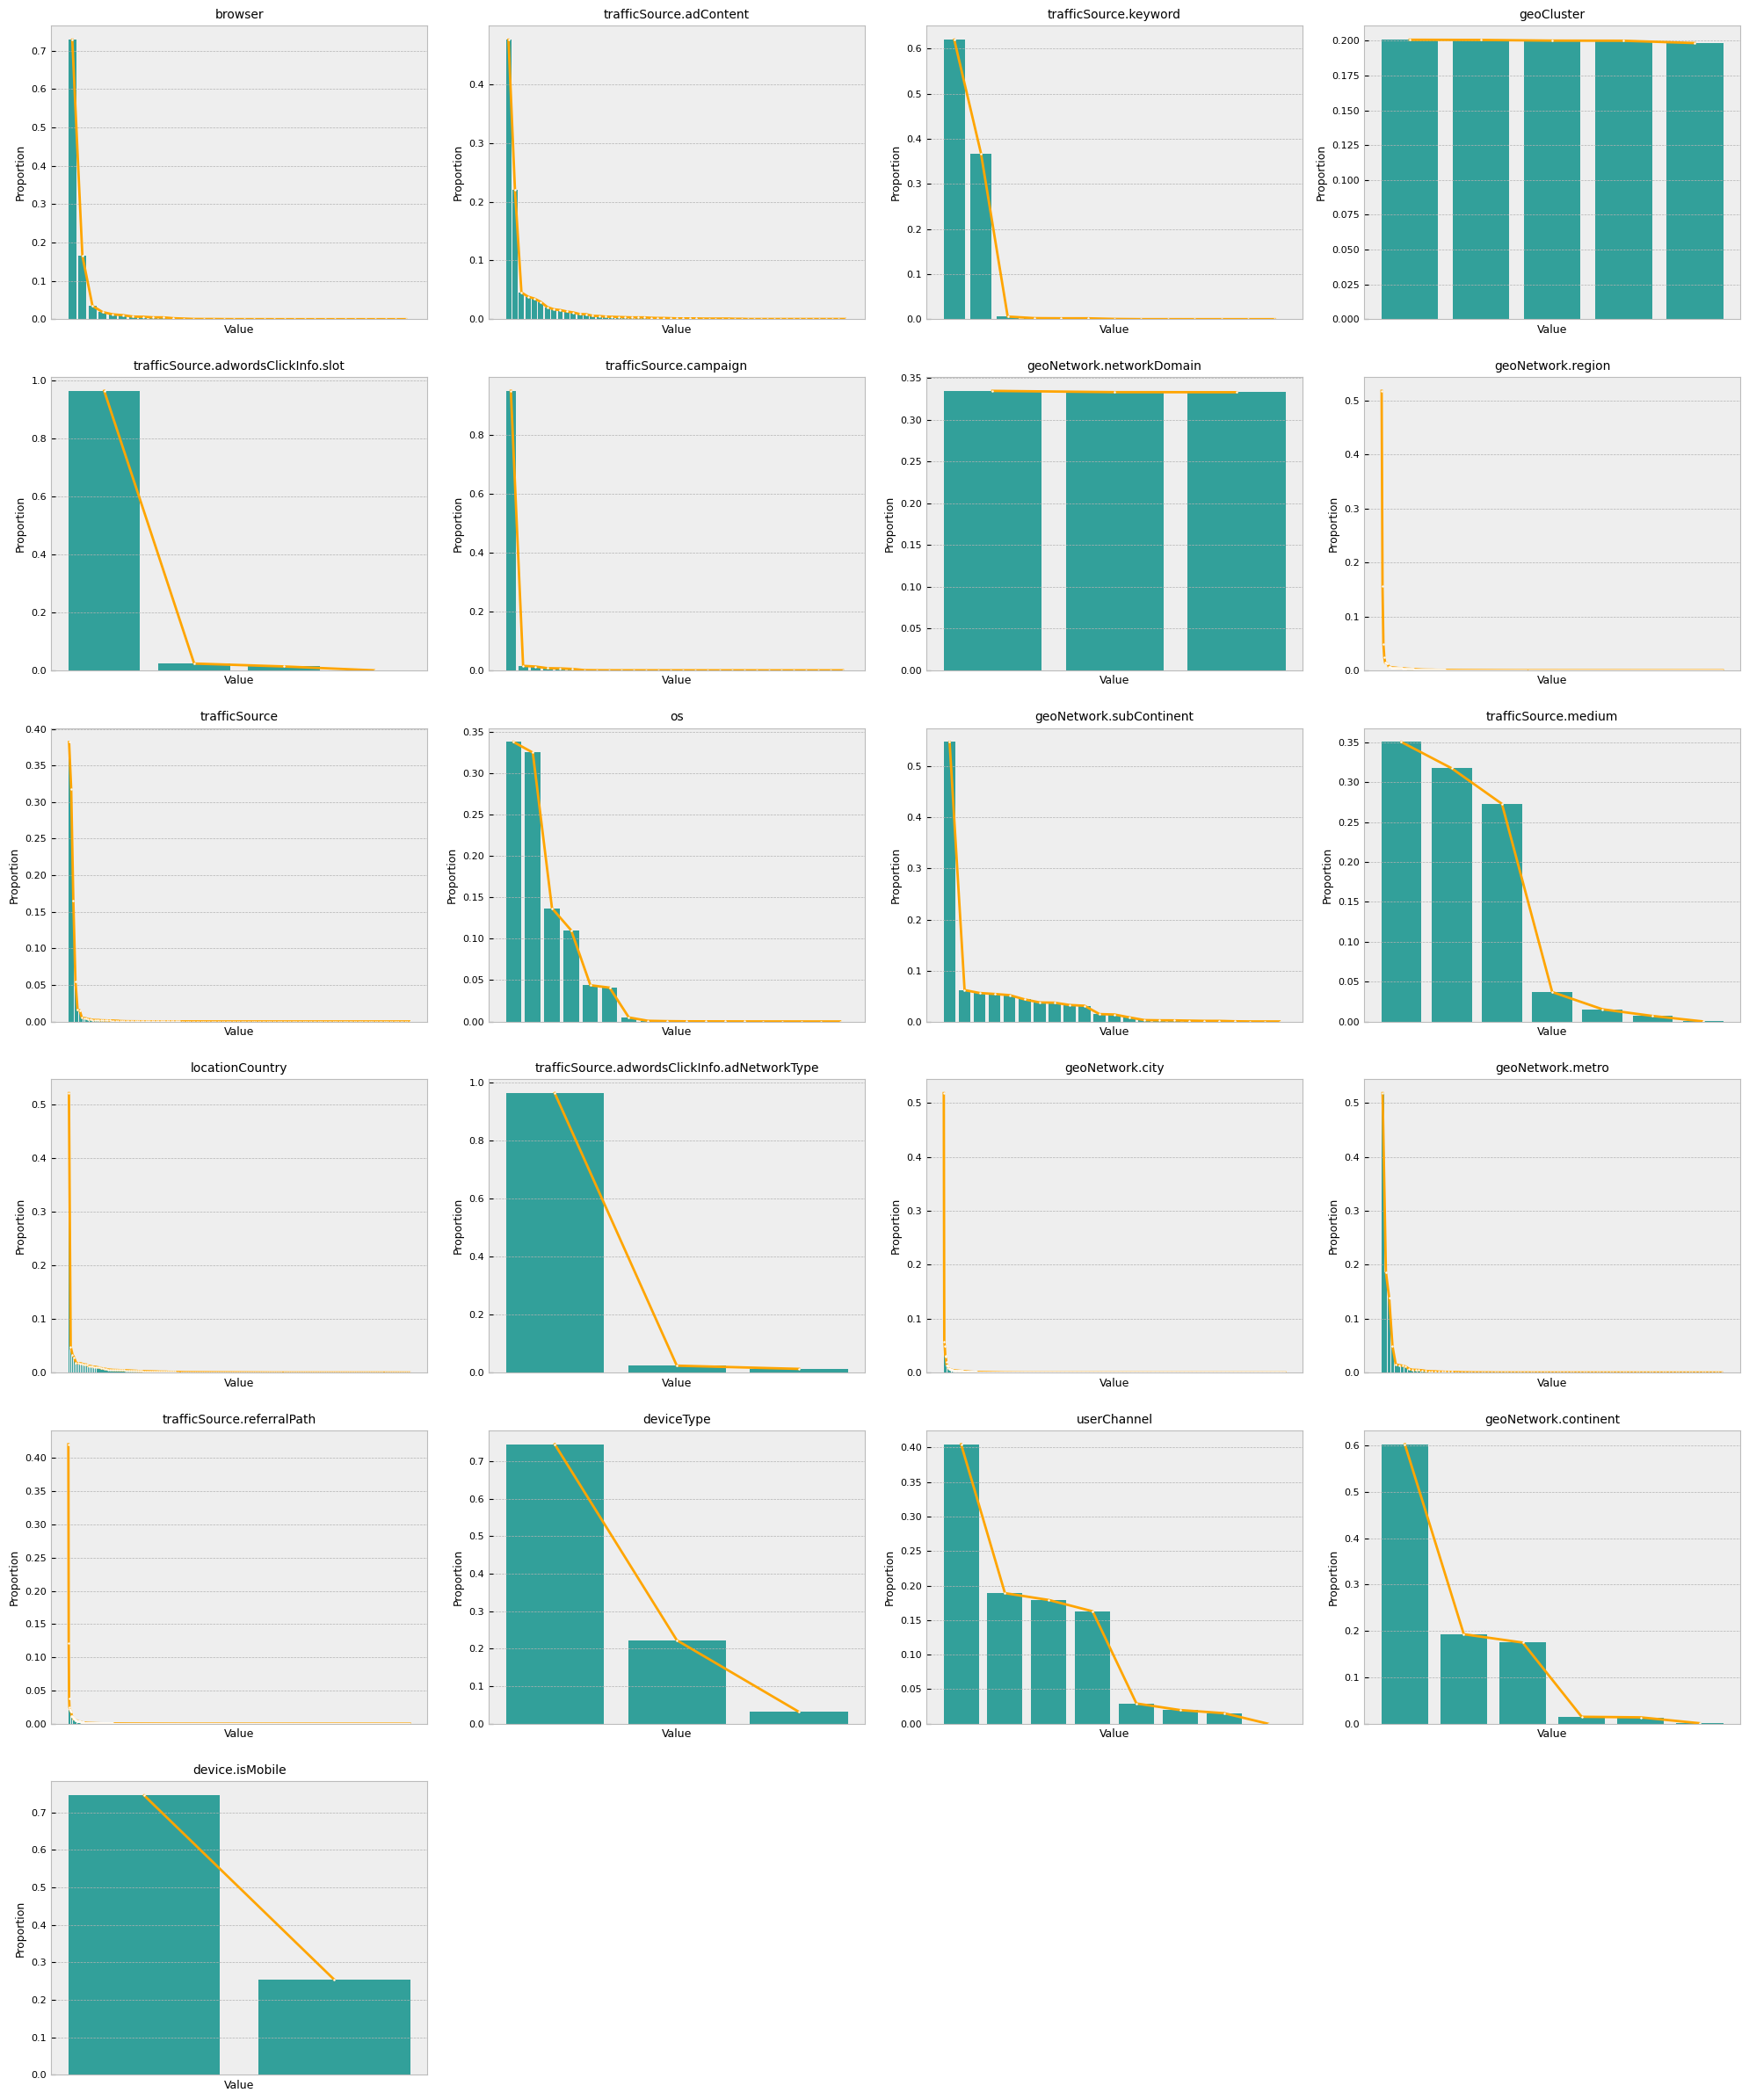

In [41]:
show_value_counts(train_df3,columns["cat_cols"])

#### target distribution over each columns entry wise

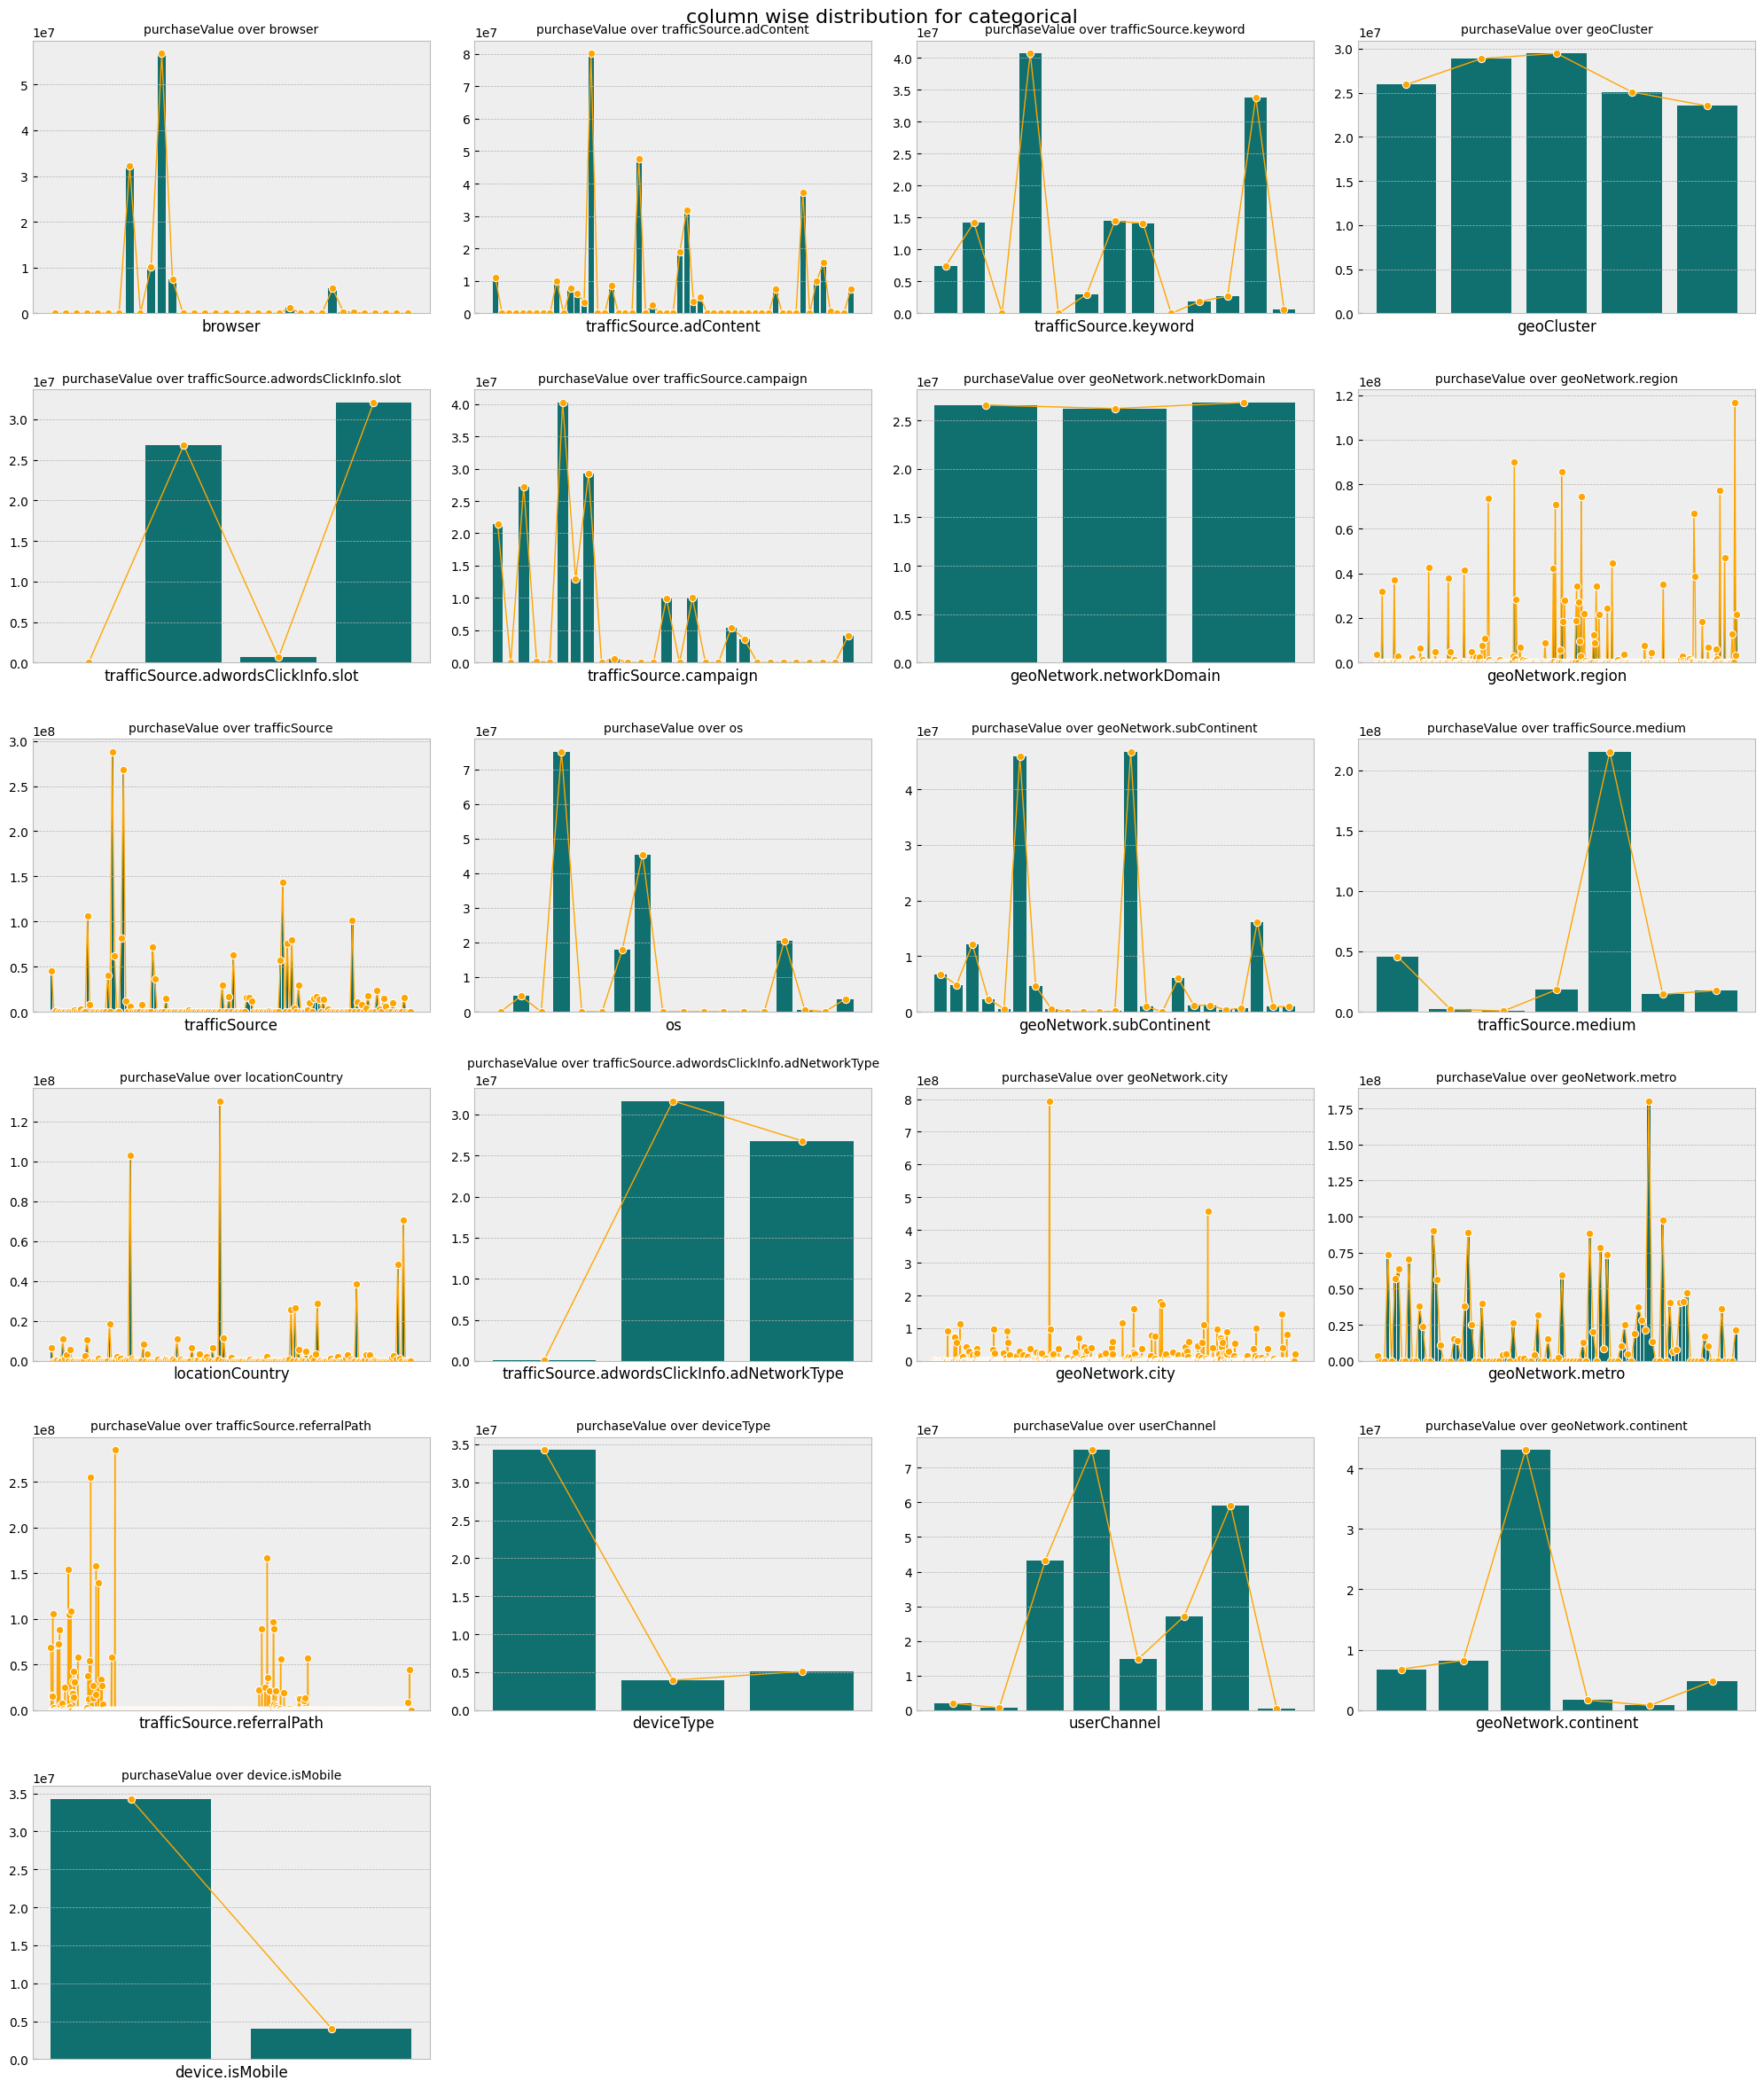

In [42]:
column_wise_distribution(train_df2,columns["cat_cols"],"purchaseValue","column wise distribution for categorical")

### columns wise distribution for geo network columns

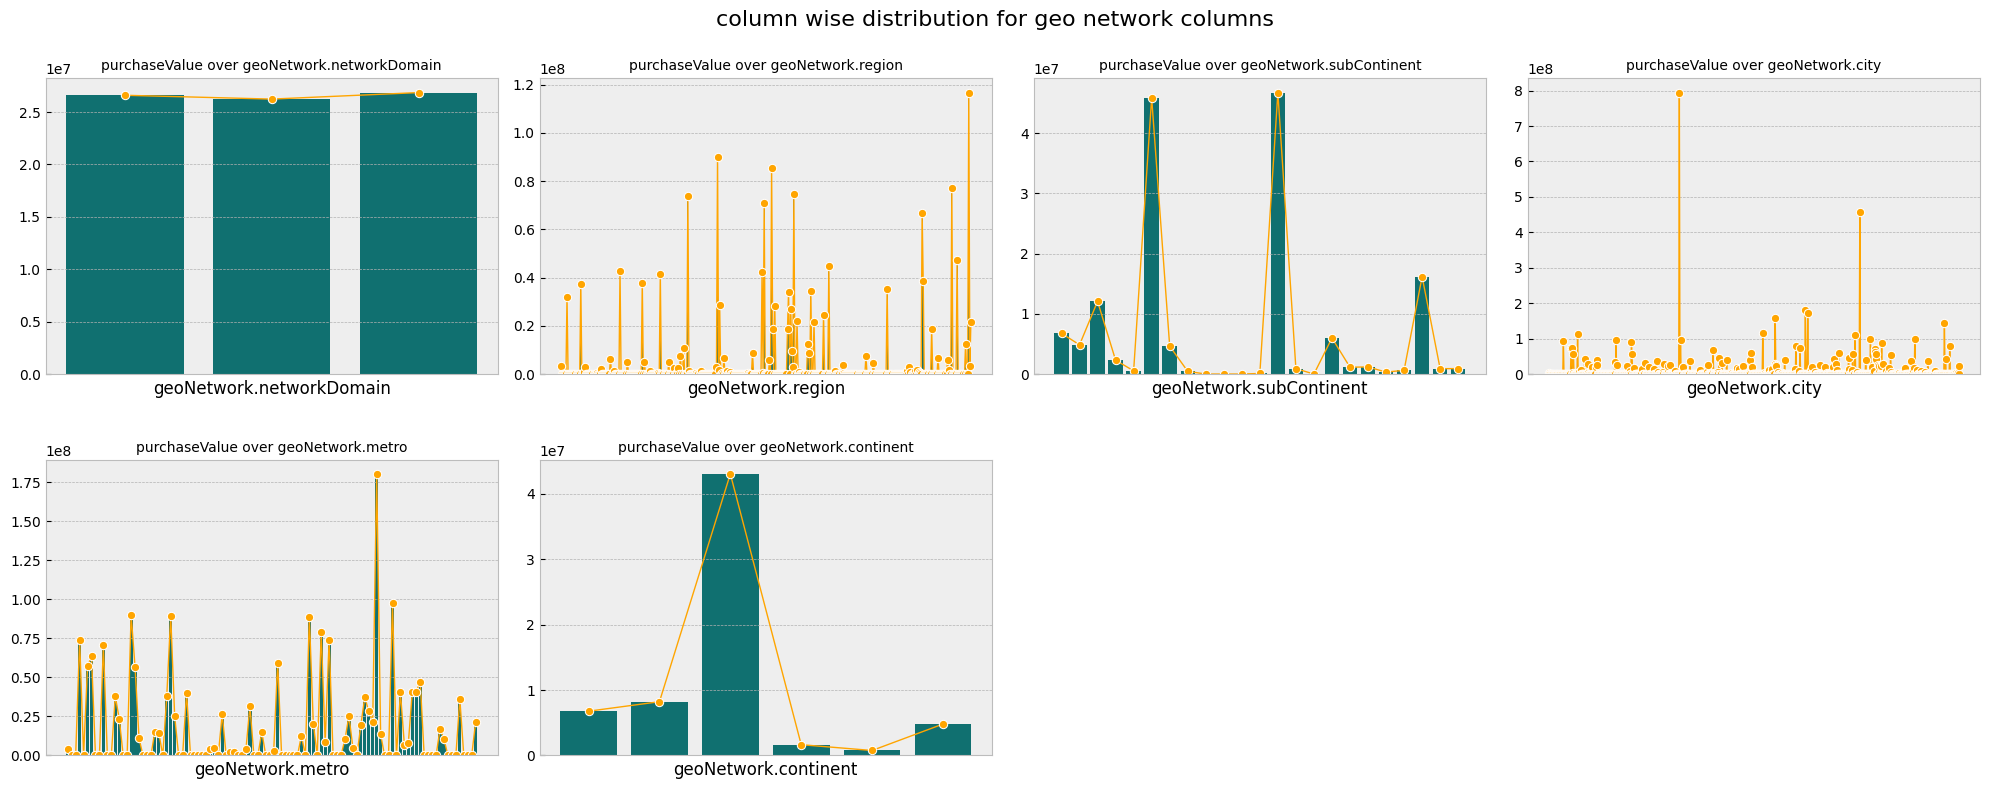

In [43]:
column_wise_distribution(train_df2,columns["geo_network"],"purchaseValue","column wise distribution for geo network columns")

### columns wise distributionfor  traffic_sources

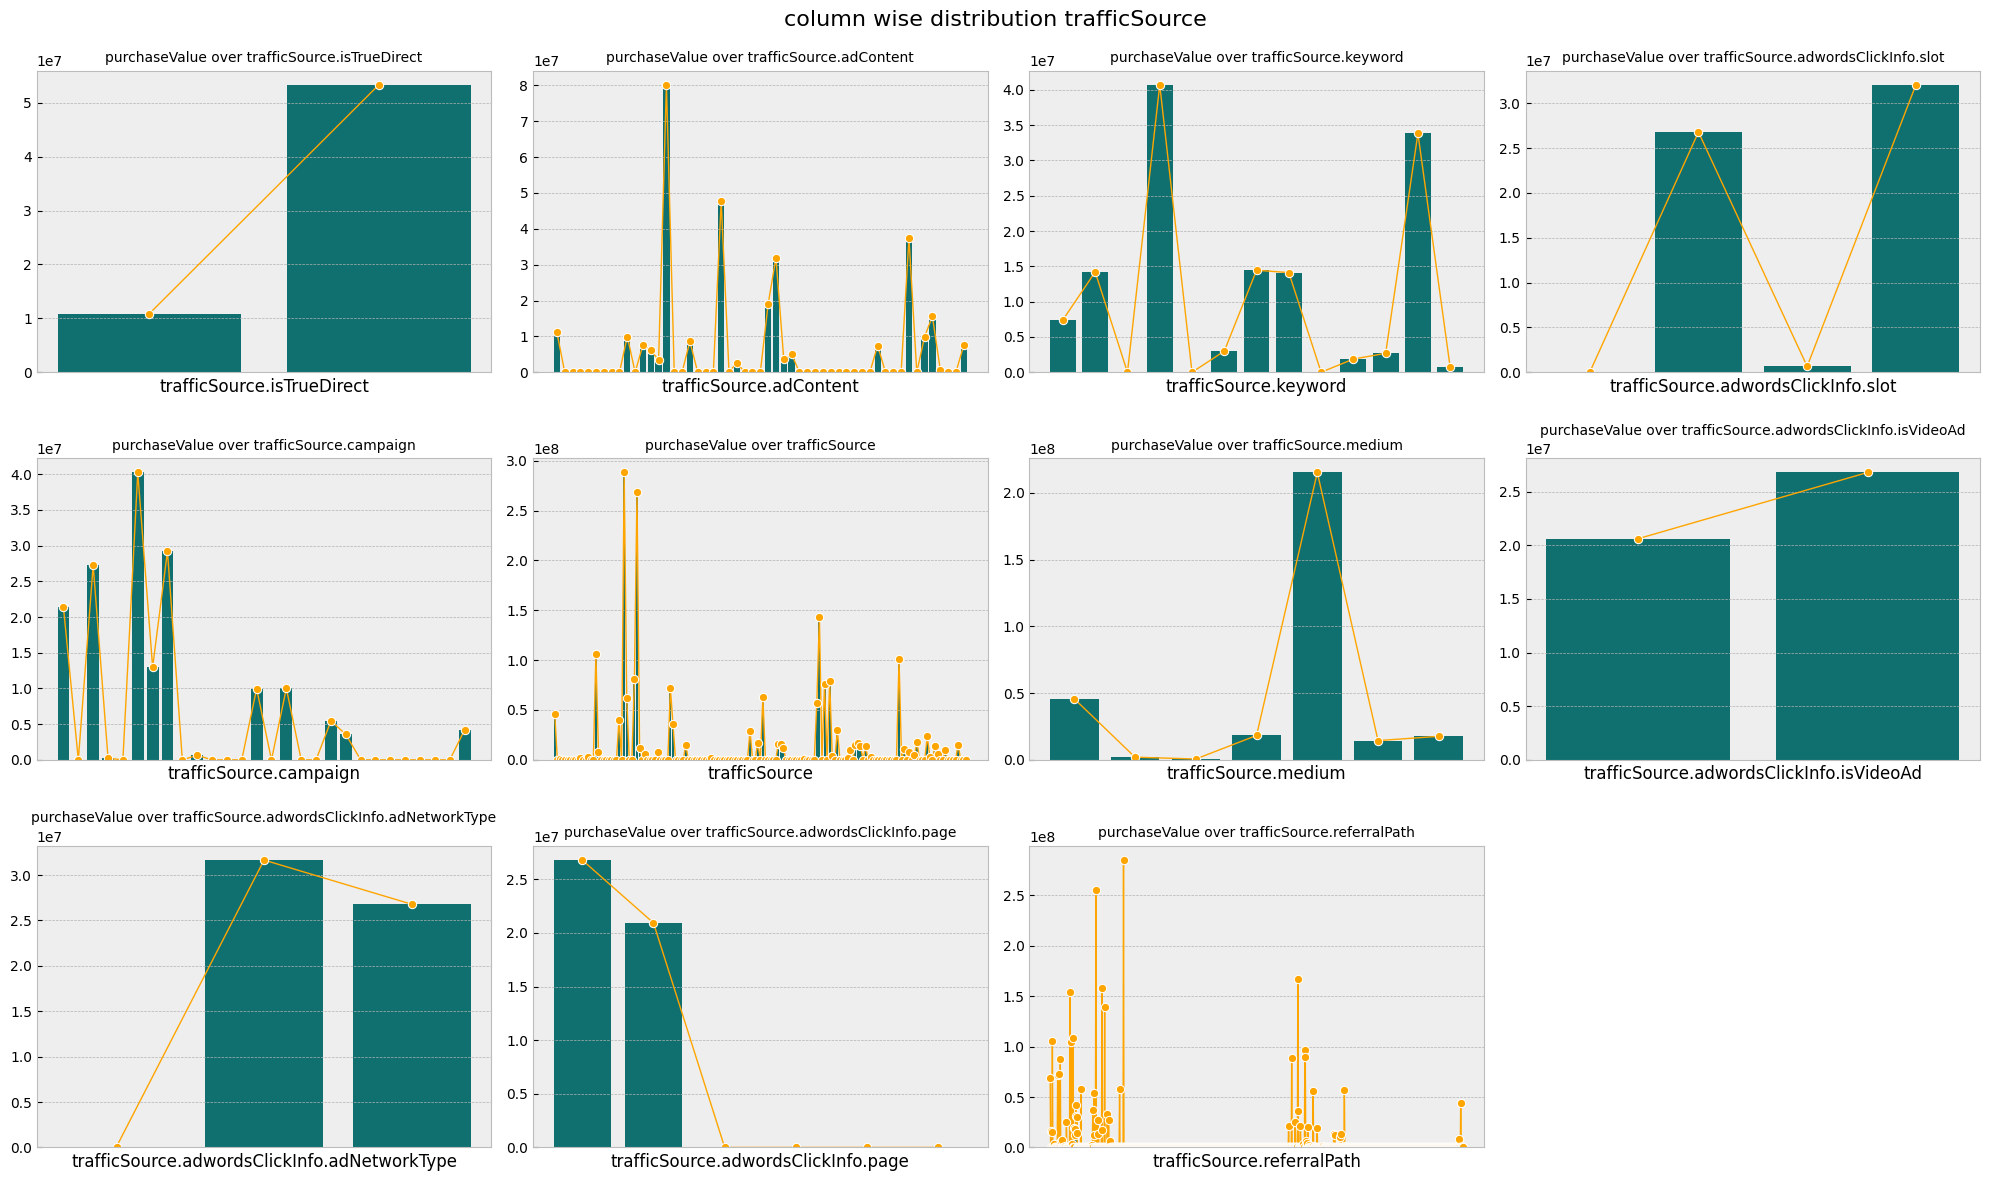

In [44]:
column_wise_distribution(train_df3,columns["traffic_source"],"purchaseValue","column wise distribution trafficSource")

### Pie charts 

In [45]:
pie_cols = []
for i in columns["cat_cols"]:
    if train_df3[i].nunique()<=20:
        pie_cols.append(i)

In [46]:
import matplotlib.pyplot as plt
import math

def show_pie_chart(df, columns_):
    plt.style.use("dark_background")
    col_num = len(columns_)
    cols = 4
    rows = math.ceil(col_num / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))  # Bigger figure for clarity
    axes = axes.flatten()

    for idx, col_name in enumerate(columns_):
        grp_ = df[col_name].value_counts()
        wedges, texts, autotexts = axes[idx].pie(
            grp_.values,
            labels=grp_.index,
            autopct='%1.1f%%',
            textprops={'fontsize': 15}  # label and percentage font size
        )
        axes[idx].set_title(col_name, fontsize=12)  # title font size

    # Hide any unused axes
    for i in range(len(columns_), len(axes)):
        axes[i].axis("off")

    plt.tight_layout(h_pad=2.0)
    plt.show()


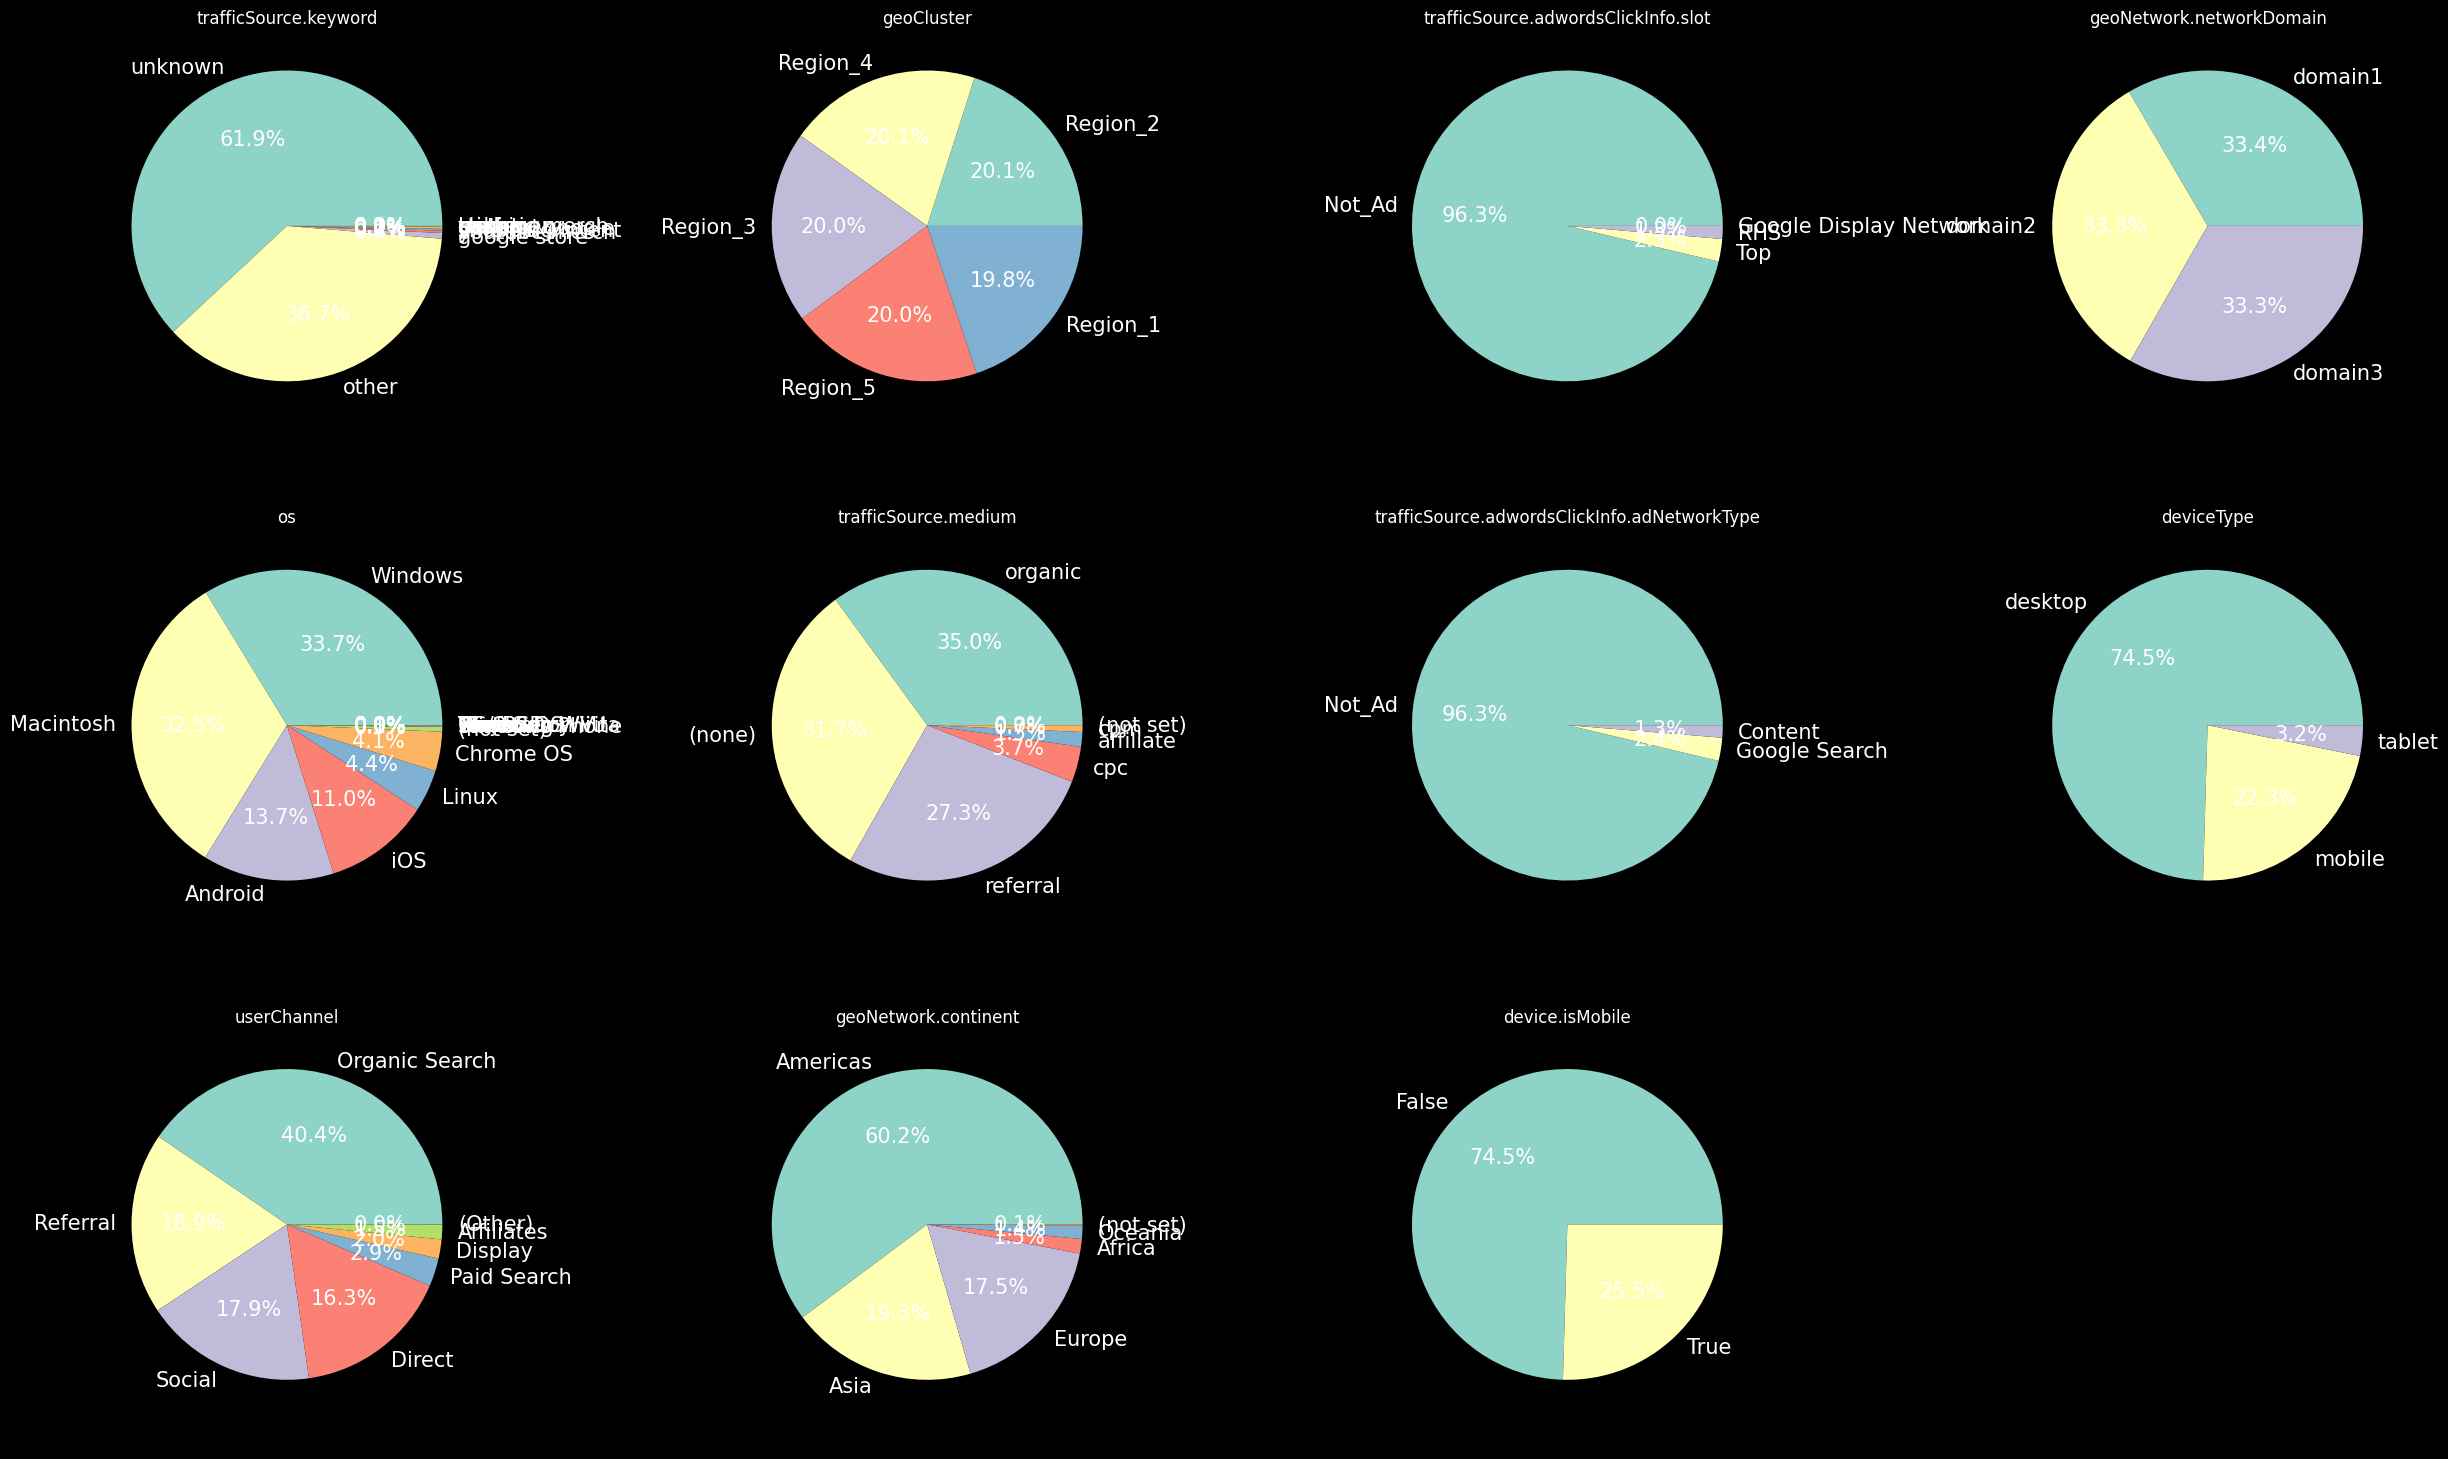

In [47]:
show_pie_chart(train_df3, pie_cols)

- geoCluster: Evenly distributed across all 5 clusters.
- Network Domain: Balanced across domain1, domain2, and domain3.
- OS: Dominated by Windows and Macintosh, followed by Android and iOS.
- Traffic Medium: Mostly organic.
- Device Type: Primarily desktop, followed by mobile.
- User Channel: Led by Organic Search,
- Continent: Mostly from Americas, then Asia and Europe.
- Is Mobile: Majority non-mobile

## 3.2 bivariate Analysis

## 3.2.1 Numerical VS Numerical Data Analysis

### Scatter plot

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

def scatter_against_reference(df, columns_, reference_col):
    warnings.filterwarnings("ignore", category=UserWarning)

    columns_ = [col for col in columns_ if col != reference_col]

    num_plots = len(columns_)
    cols = 3
    rows = math.ceil(num_plots / cols)

    fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = ax.flatten()

    for i, col in enumerate(columns_):
        sns.scatterplot(data=df, x=col, y=reference_col, ax=axes[i],
                        color='lightseagreen', edgecolor='black', alpha=0.6)
        sns.lineplot(data=df.sort_values(col), x=col, y=reference_col, ax=axes[i],
                     color='orange', linewidth=2)

        axes[i].set_title(f"{col} vs {reference_col}", fontsize=10)
        axes[i].set_xlabel(col, fontsize=9)
        axes[i].set_ylabel(reference_col, fontsize=9)
        axes[i].tick_params(axis='both', labelsize=8)
        axes[i].grid()

    for i in range(num_plots, len(axes)):
        axes[i].axis("off")

    plt.tight_layout(h_pad=2.0)
    plt.show()


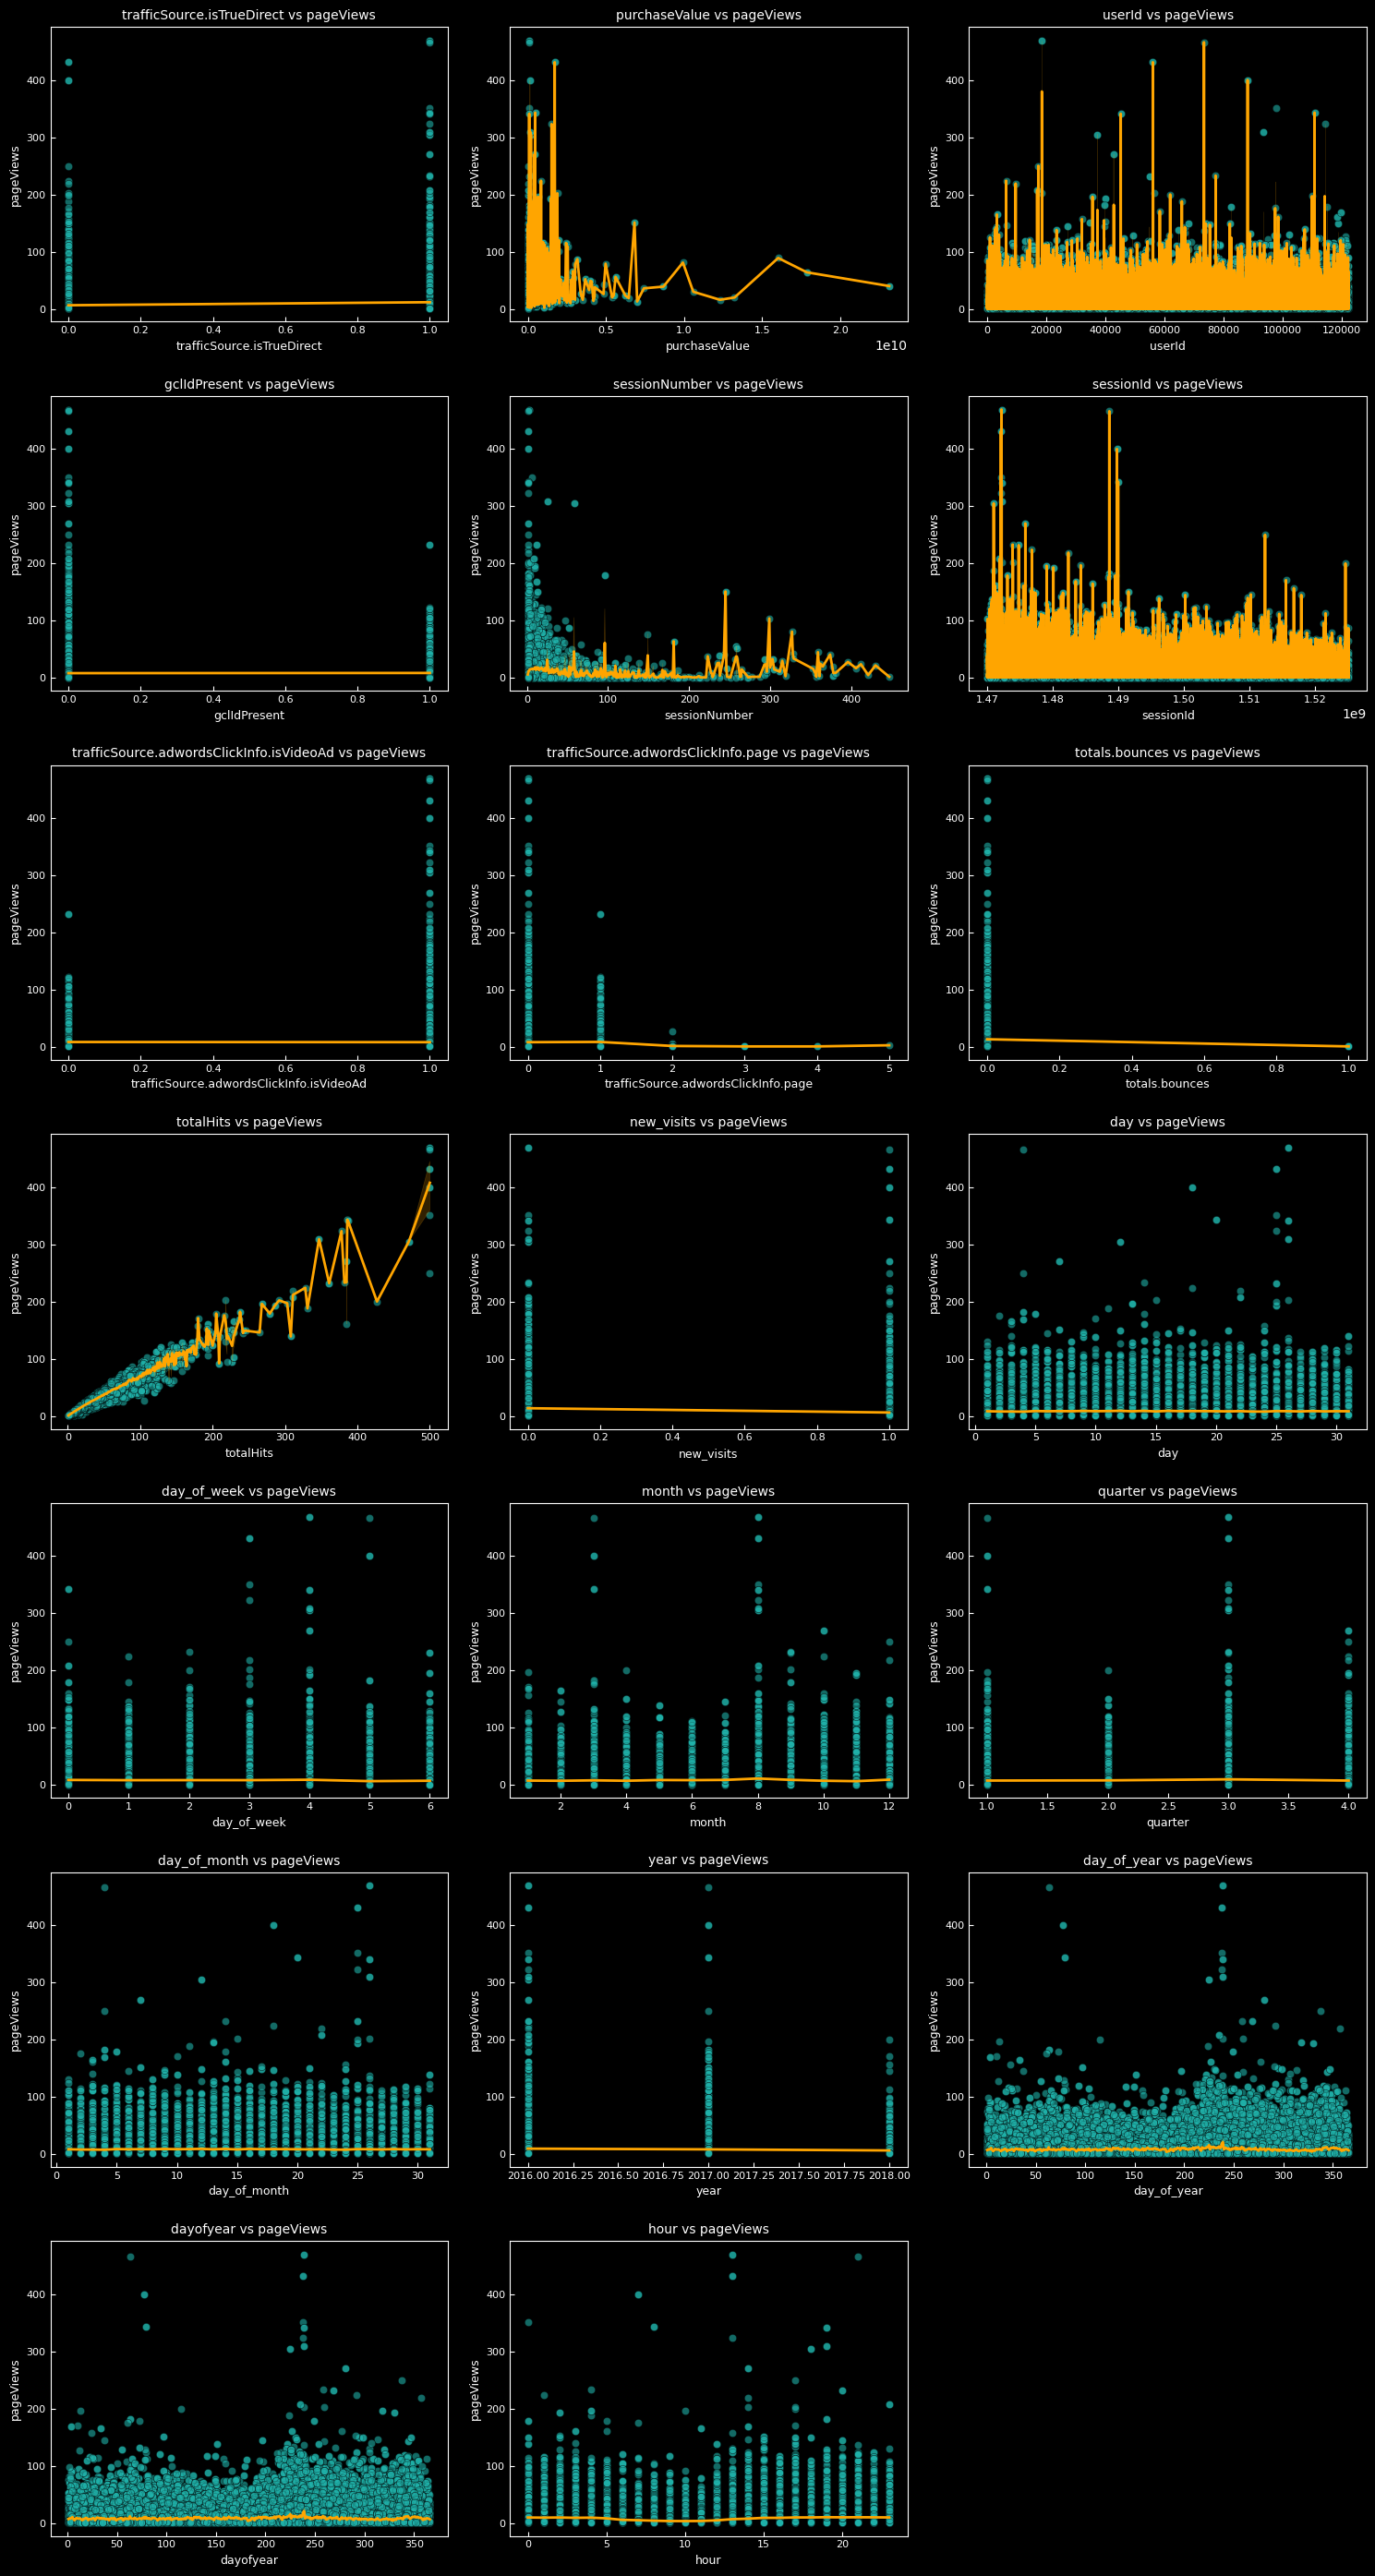

In [49]:
scatter_against_reference(train_df3,columns["num_cols"],"pageViews")


### Heatmap

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_correlation_heatmap(df, columns_):
    corr = df[columns_].corr()  # correlation matrix

    plt.figure(figsize=(len(columns_) * 0.8, len(columns_) * 0.8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", 
                linewidths=0.5, linecolor='gray', square=True,
                cbar_kws={"shrink": 0.75})
    
    plt.title("Correlation Heatmap", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.tight_layout()
    plt.show()


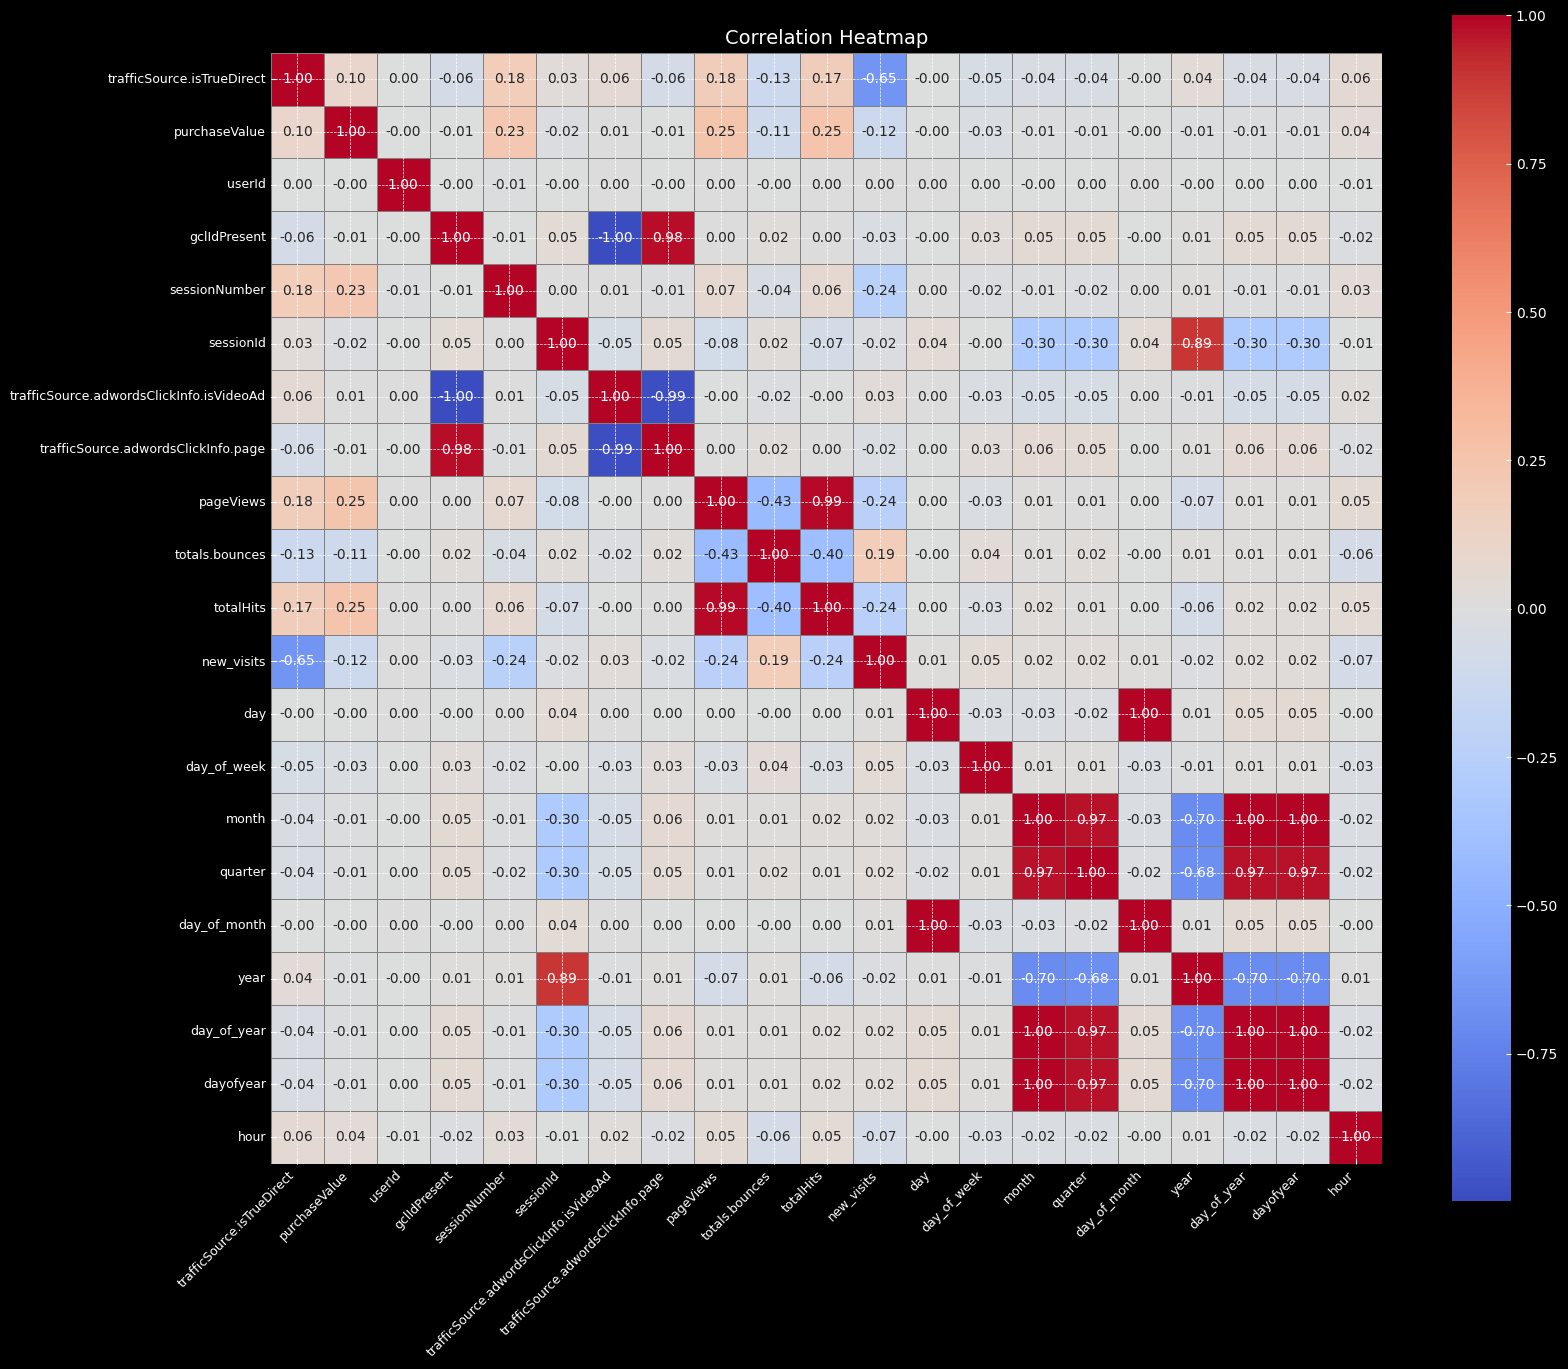

In [51]:
show_correlation_heatmap(train_df3, columns["num_cols"])

* pageViews and totalHits have a very strong positive correlation of 0.99

### covariance matrix

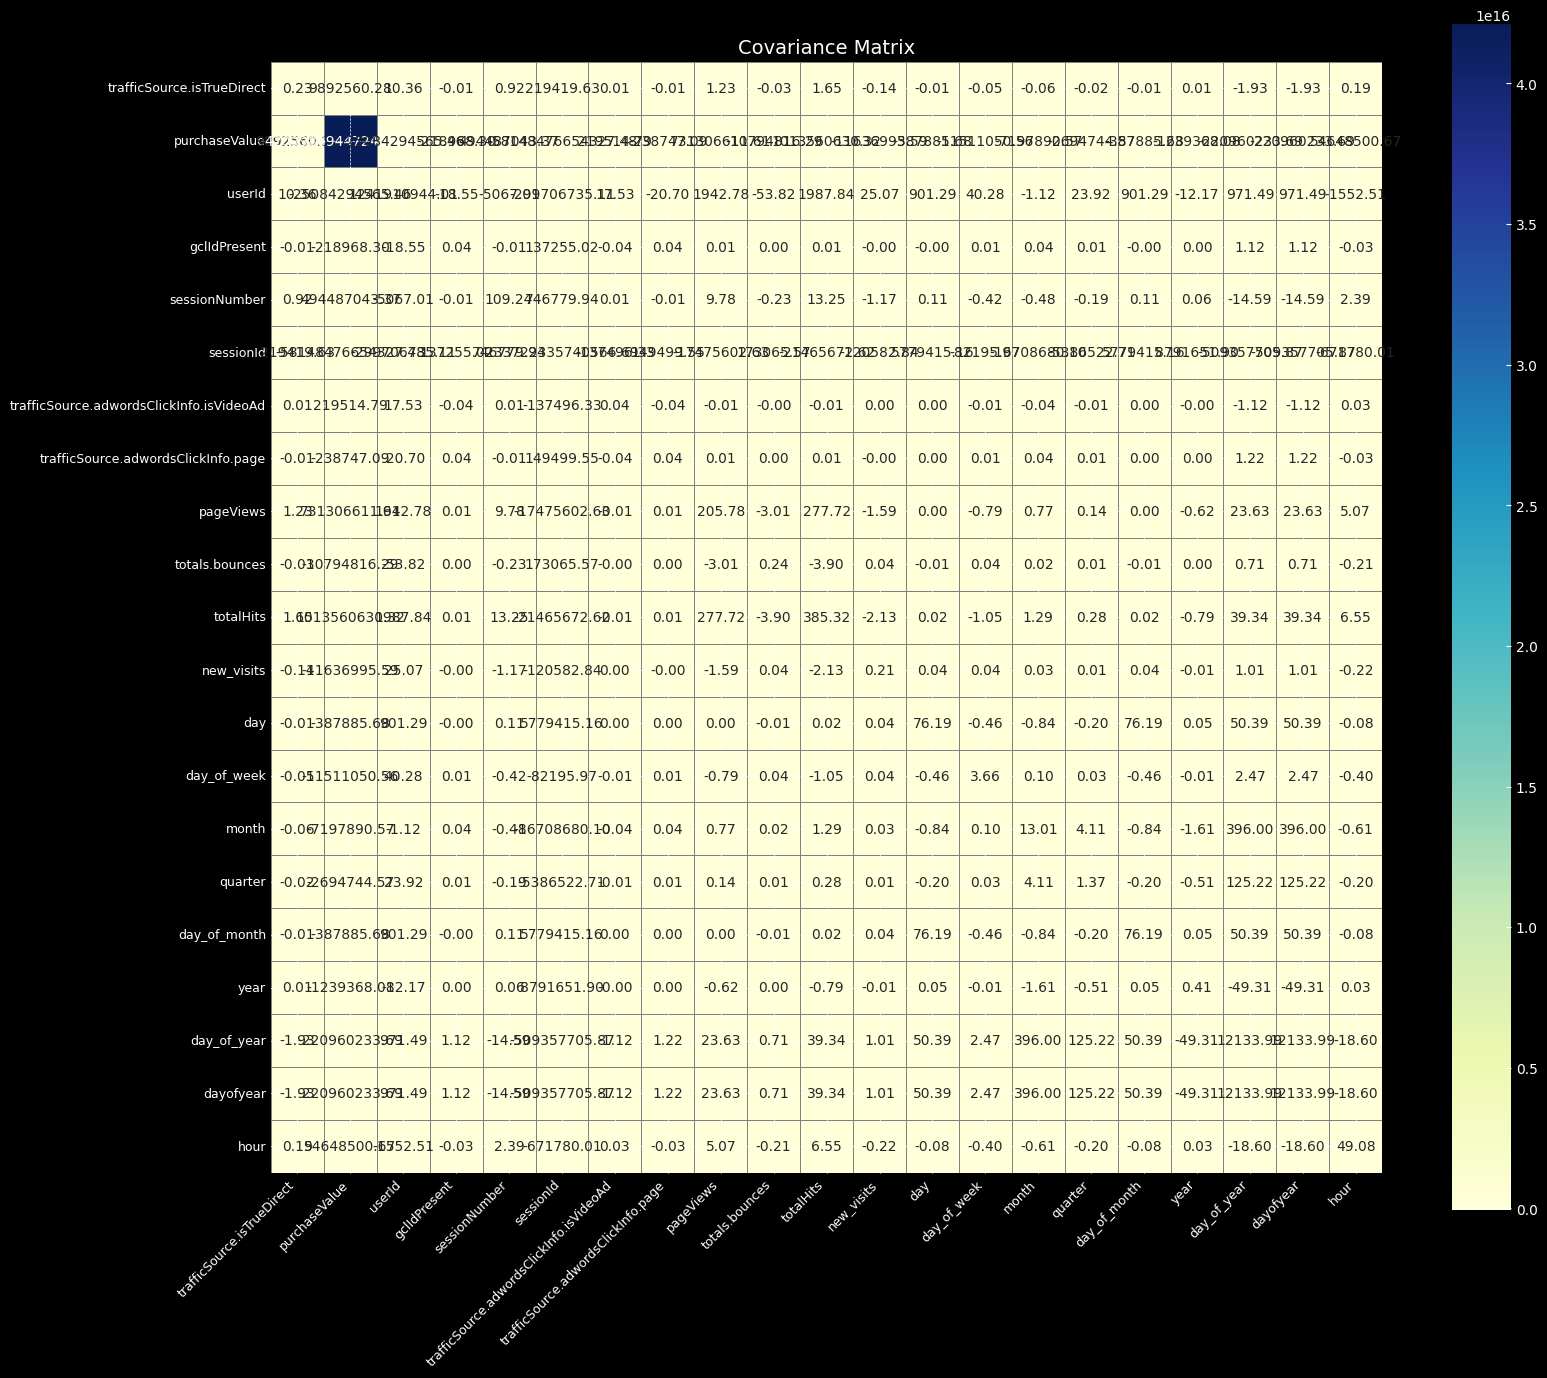

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_covariance_heatmap(df, columns_):
    cov_matrix = df[columns_].cov()  # compute covariance

    plt.figure(figsize=(len(columns_) * 0.8, len(columns_) * 0.8))
    sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
                linewidths=0.5, linecolor='gray', square=True,
                cbar_kws={"shrink": 0.75})
    
    plt.title("Covariance Matrix", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.tight_layout()
    plt.show()
show_covariance_heatmap(train_df3, columns["num_cols"])


## 3.2.2 Numerical vs categorical

### Box plot

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

def boxplot_cat_vs_num(df, cat_cols, num_col):
    warnings.filterwarnings("ignore", category=UserWarning)

    num_plots = len(cat_cols)
    cols = 3
    rows = math.ceil(num_plots / cols)

    fig, ax = plt.subplots(rows, cols, figsize=(cols * 5.5, rows * 5))
    axes = ax.flatten()

    for i, cat_col in enumerate(cat_cols):
        sns.boxplot(data=df, x=cat_col, y=num_col, ax=axes[i], palette="Set2")

        axes[i].set_title(f"{num_col} vs {cat_col}", fontsize=10)
        # axes[i].set_xlabel(cat_col, fontsize=9)
        axes[i].set_ylabel(num_col, fontsize=9)
        axes[i].tick_params(axis='x', labelrotation=45, labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)
        axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for i in range(num_plots, len(axes)):
        axes[i].axis("off")

    plt.tight_layout(h_pad=2.0)
    plt.show()


C:\Users\KuldeepChavda\AppData\Local\Temp\ipykernel_18360\502825305.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, ax=axes[i], palette="Set2")
C:\Users\KuldeepChavda\AppData\Local\Temp\ipykernel_18360\502825305.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, ax=axes[i], palette="Set2")
C:\Users\KuldeepChavda\AppData\Local\Temp\ipykernel_18360\502825305.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, ax=axes[i], palette="Set2")
C:\User

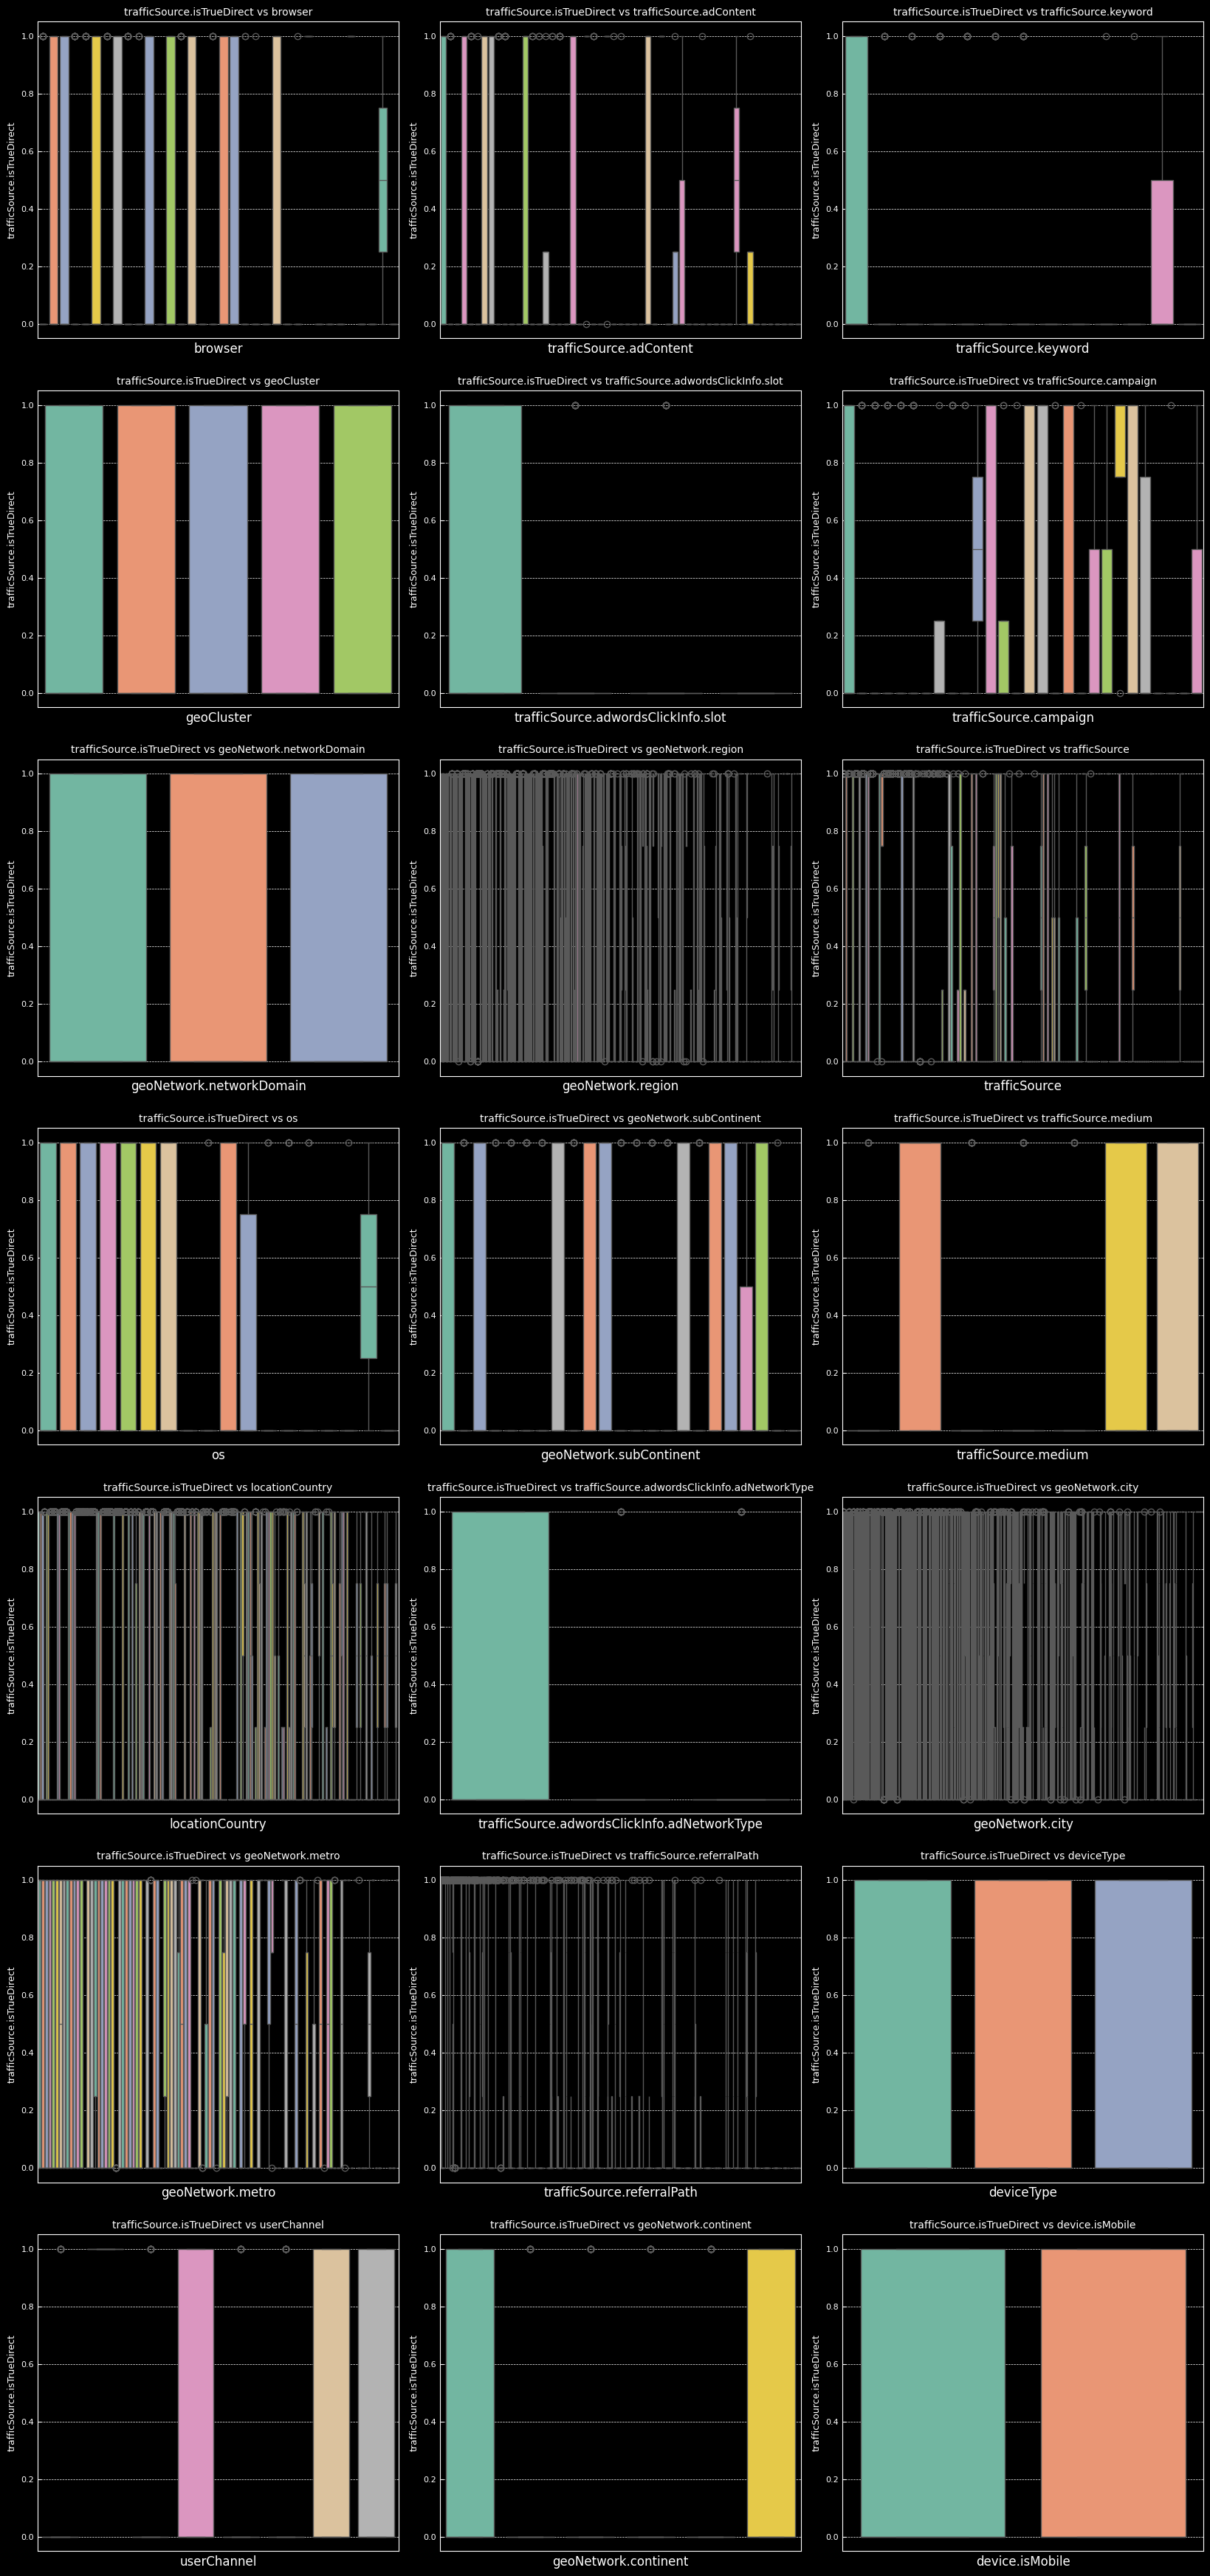

In [54]:
boxplot_cat_vs_num(train_df3,columns["cat_cols"],columns["num_cols"][0])

### mean of purchase Value over columns (for first 10)

In [55]:
def show_grouped_means(df, cat_cols, num_col):
    for cat in cat_cols:
        print(f"\n🔹 Mean of '{num_col}' grouped by '{cat}':\n")
        display(df.groupby(cat)[num_col].mean().sort_values(ascending=False)[:10])

In [56]:
show_grouped_means(train_df3, columns["cat_cols"],"purchaseValue")


🔹 Mean of 'purchaseValue' grouped by 'browser':



browser
Firefox             56,781,575.29
Chrome              32,170,820.75
Edge                10,239,958.88
Internet Explorer    7,490,626.45
Safari               5,451,598.73
Opera                1,201,204.38
Safari (in-app)        368,965.95
Samsung Internet       279,591.47
Android Webview        110,591.03
(not set)                    0.00
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'trafficSource.adContent':



trafficSource.adContent
Drinkware 120x600                 80,130,000.00
Google Merchandise Collection     47,694,362.52
{KeyWord:Google Branded Gear}     37,373,333.33
Official Google Merchandise       31,915,652.17
Office Placement 160x600          19,015,000.00
{KeyWord:Google Men's T-Shirts}   15,564,000.00
20% discount                      11,155,555.56
Bags 300x250                       9,967,500.00
{KeyWord:Google Drinkware}         9,966,666.67
Full auto ad IMAGE ONLY            8,602,622.95
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'trafficSource.keyword':



trafficSource.keyword
google store      40,706,920.82
unknown           33,831,886.14
other             14,450,296.69
general google    14,209,605.26
shopping intent   14,119,090.91
clothing           7,427,142.86
mug                2,990,000.00
t-shirt            2,683,283.58
sticker            1,870,000.00
youtube merch        678,265.68
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'geoCluster':



geoCluster
Region_3   29,453,752.21
Region_2   28,864,660.00
Region_1   25,910,777.18
Region_4   25,078,946.22
Region_5   23,500,926.28
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'trafficSource.adwordsClickInfo.slot':



trafficSource.adwordsClickInfo.slot
Top                      32,058,636.53
Not_Ad                   26,791,852.84
RHS                         655,163.78
Google Display Network            0.00
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'trafficSource.campaign':



trafficSource.campaign
AW - Accessories                                             40,240,209.70
AW - Dynamic Search Ads Whole Site                           29,200,794.92
(not set)                                                    27,253,185.53
"google + redesign/Accessories March 17" All Users           21,377,407.41
AW - Apparel                                                 12,970,000.00
Page: contains "/google+redesign/drinkware"                  10,016,250.00
Page: contains "/google+redesign/bags" All Users              9,967,500.00
Page: contains "/google+redesign/office"                      5,432,857.14
test-liyuhz                                                   4,200,000.00
Page: contains "/google+redesign/office" Similar Audiences    3,581,666.67
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'geoNetwork.networkDomain':



geoNetwork.networkDomain
domain3   26,856,773.29
domain1   26,599,345.53
domain2   26,235,585.85
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'geoNetwork.region':



geoNetwork.region
Zulia           116,658,169.01
Illinois         90,063,341.54
Michigan         85,448,641.39
Virginia         77,153,565.46
New York         74,425,134.90
Georgia          73,760,121.21
Massachusetts    70,708,887.04
Tennessee        66,938,493.15
Washington       47,200,180.72
Pichincha        44,645,000.00
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'trafficSource':



trafficSource
chat.google.com       288,158,333.33
dfa                   268,613,760.13
mail.google.com       143,216,102.36
basecamp.com          105,800,000.00
search.myway.com      100,940,000.00
dealspotr.com          81,440,727.27
mg.mail.yahoo.com      79,155,000.00
mall.googleplex.com    75,604,298.69
gatewaycdi.com         71,700,000.00
hangouts.google.com    63,338,888.89
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'os':



os
Chrome OS       75,067,822.05
Macintosh       45,435,709.66
Windows         20,582,789.32
Linux           17,843,422.66
Android          4,511,532.84
iOS              3,700,139.48
Windows Phone      555,789.47
(not set)                0.00
FreeBSD                  0.00
BlackBerry               0.00
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'geoNetwork.subContinent':



geoNetwork.subContinent
Northern America   46,763,889.87
Eastern Africa     45,894,818.65
Western Africa     16,180,317.46
Caribbean          12,077,469.88
(not set)           6,768,382.35
South America       5,988,750.00
Australasia         4,855,692.70
Eastern Asia        4,640,272.04
Central America     2,307,522.39
Southern Africa     1,181,666.67
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'trafficSource.medium':



trafficSource.medium
cpm         215,352,668.33
(none)       45,735,310.42
cpc          18,271,966.87
referral     17,644,532.65
organic      14,427,341.47
(not set)     1,998,000.00
affiliate       634,018.01
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'locationCountry':



locationCountry
Kenya           130,260,294.12
Curaçao         103,165,000.00
Venezuela        70,718,206.90
United States    48,265,992.81
St. Lucia        38,736,666.67
Puerto Rico      28,669,310.34
Nigeria          26,408,290.16
Nicaragua        25,596,000.00
Canada           18,669,132.05
Kuwait           11,343,809.52
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'trafficSource.adwordsClickInfo.adNetworkType':



trafficSource.adwordsClickInfo.adNetworkType
Google Search   31,654,500.72
Not_Ad          26,791,852.84
Content             83,841.02
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'geoNetwork.city':



geoNetwork.city
Fort Collins         794,560,000.00
Riverside            458,540,000.00
North Attleborough   180,210,000.00
Oakland              173,467,301.59
Milwaukee            159,556,000.00
Walnut Creek         142,716,000.00
Maracaibo            116,658,169.01
Baltimore            113,047,500.00
Reston               109,550,000.00
Tacoma               100,000,000.00
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'geoNetwork.metro':



geoNetwork.metro
Providence-New Bedford,MA   180,210,000.00
Roanoke-Lynchburg VA         97,831,843.97
Chicago IL                   90,229,919.85
Detroit MI                   89,255,759.08
Milwaukee WI                 88,642,222.22
Nashville TN                 78,814,677.42
New York NY                  73,936,436.34
Atlanta GA                   73,909,433.20
Boston MA-Manchester NH      70,579,147.16
Baltimore MD                 63,518,750.00
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'trafficSource.referralPath':



trafficSource.referralPath
/hangouts/_/google.com/dan-hackathon                                                                                                                                              285,025,000.00
/community/partners/local-sites/japanese/gsuite/marketing/google-store                                                                                                            254,850,000.00
/mail/u/0/                                                                                                                                                                        166,635,336.54
/deal/-ds-sign-up-for-google-merchandise-store-emails-for-special-coup-c179                                                                                                       158,170,625.00
/_/scs/mail-static/_/js/k=gmail.main.en.sXDiEpUnPe0.O/m=m_i,t,it/am=nhGvDGD-3_uDcQ3DgK701brz33u-Xyo_e7nH_ycDROlVoP_N_h_A_4H-tI0C/rt=h/d=1/rs=AHGWq9Bm-1qj1hhkb8cG9EpeilyYgWjoxA   154,040,000.00
/documen


🔹 Mean of 'purchaseValue' grouped by 'deviceType':



deviceType
desktop   34,247,282.03
tablet     5,091,584.08
mobile     3,927,222.05
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'userChannel':



userChannel
Display          75,144,554.54
Referral         59,171,883.09
Direct           43,329,104.10
Paid Search      27,116,394.60
Organic Search   14,699,657.75
(Other)           1,998,000.00
Affiliates          634,018.01
Social              469,620.42
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'geoNetwork.continent':



geoNetwork.continent
Americas    43,043,345.60
Africa       8,218,906.70
(not set)    6,768,382.35
Oceania      4,801,270.24
Asia         1,645,135.36
Europe         757,683.55
Name: purchaseValue, dtype: float64


🔹 Mean of 'purchaseValue' grouped by 'device.isMobile':



device.isMobile
False   34,241,675.49
True     4,074,888.41
Name: purchaseValue, dtype: float64

##  3.2.3 categorical vs Categoriacal

### Heatmap of counts

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def crosstab_count_heatmap(df, col1, col2, figsize=(15, 8), rotate_xticks=True, show_xlabel=False):
    ct = pd.crosstab(df[col1], df[col2])

    plt.figure(figsize=figsize)
    sns.heatmap(ct, annot=False, cmap="YlGnBu", linewidths=0.5, linecolor='gray')

    plt.title(f"Count Heatmap: {col1} vs {col2}", fontsize=14)

    if show_xlabel:
        plt.xlabel(col2)
    else:
        plt.xlabel("")

    if rotate_xticks:
        plt.xticks(rotation=90)
    else:
        plt.xticks([])

    plt.ylabel(col1)
    plt.tight_layout()
    plt.show()


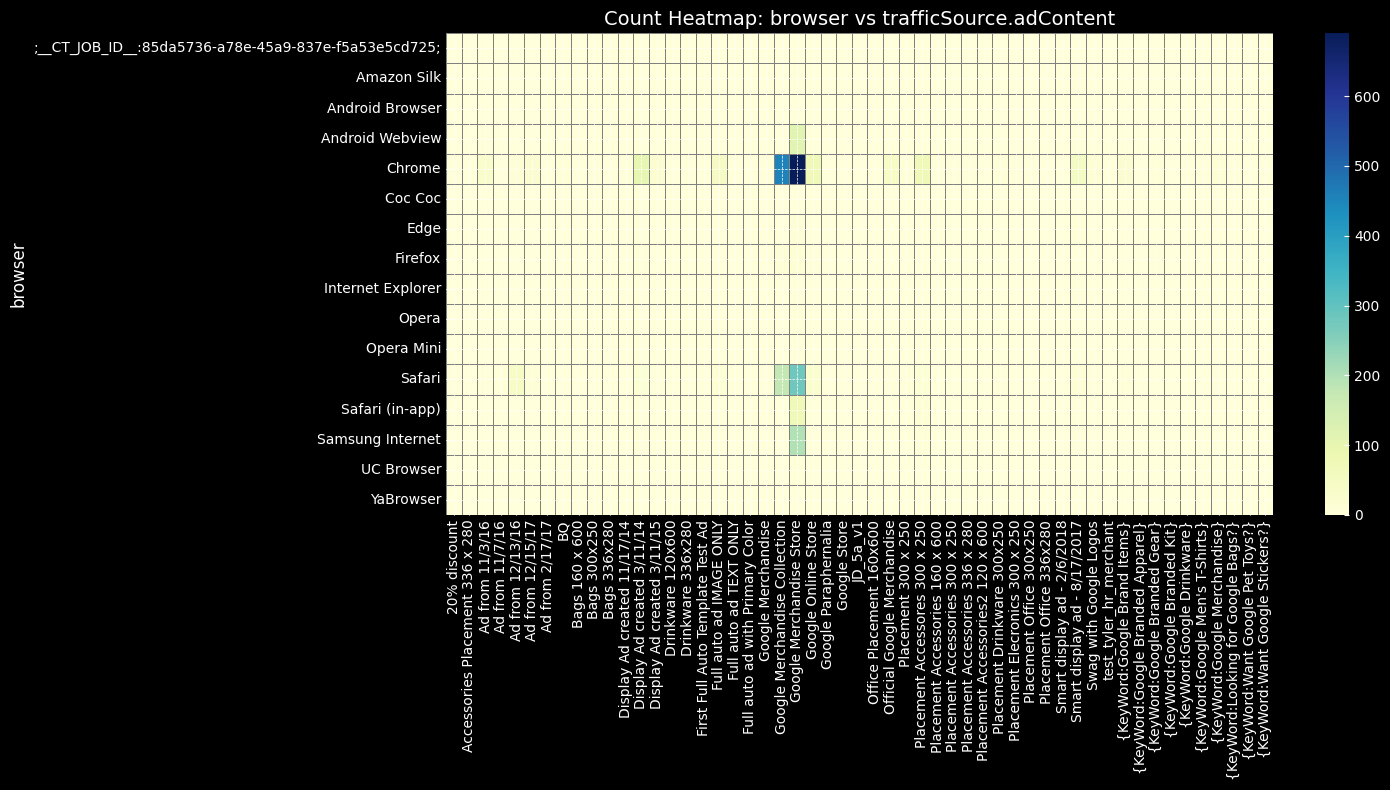

In [58]:
crosstab_count_heatmap(train_df3, columns["cat_cols"][0],columns["cat_cols"][1])

In [59]:
train_df3.columns

Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'trafficSource.adContent', 'trafficSource.keyword', 'geoCluster',
       'trafficSource.adwordsClickInfo.slot', 'userId',
       'trafficSource.campaign', 'geoNetwork.networkDomain', 'gclIdPresent',
       'sessionNumber', 'geoNetwork.region', 'trafficSource', 'sessionId',
       'os', 'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'locationCountry',
       'trafficSource.adwordsClickInfo.adNetworkType', 'geoNetwork.city',
       'trafficSource.adwordsClickInfo.page', 'geoNetwork.metro', 'pageViews',
       'trafficSource.referralPath', 'totals.bounces', 'date', 'deviceType',
       'userChannel', 'totalHits', 'geoNetwork.continent', 'device.isMobile',
       'new_visits', 'day', 'day_of_week', 'month', 'quarter', 'day_of_month',
       'year', 'day_of_year', 'dayofyear', 'weekofyear', 'hour'],
      dtype='object')

In [60]:
columns=  get_int_str_cols(train_df3)

Distribution correct: False
Total cols: 44 
Numerical: 21 
Categorical: 22 
time cols 0


## Feature engineering

In [61]:
def get_purchases(df,low, high):
    return df[(df["purchaseValue"]>low)&(df["purchaseValue"]<=high)]
purchases =  get_purchases(train_df3,0,train_df3["purchaseValue"].max())

In [62]:
columns=  get_int_str_cols(train_df3)

Distribution correct: False
Total cols: 44 
Numerical: 21 
Categorical: 22 
time cols 0


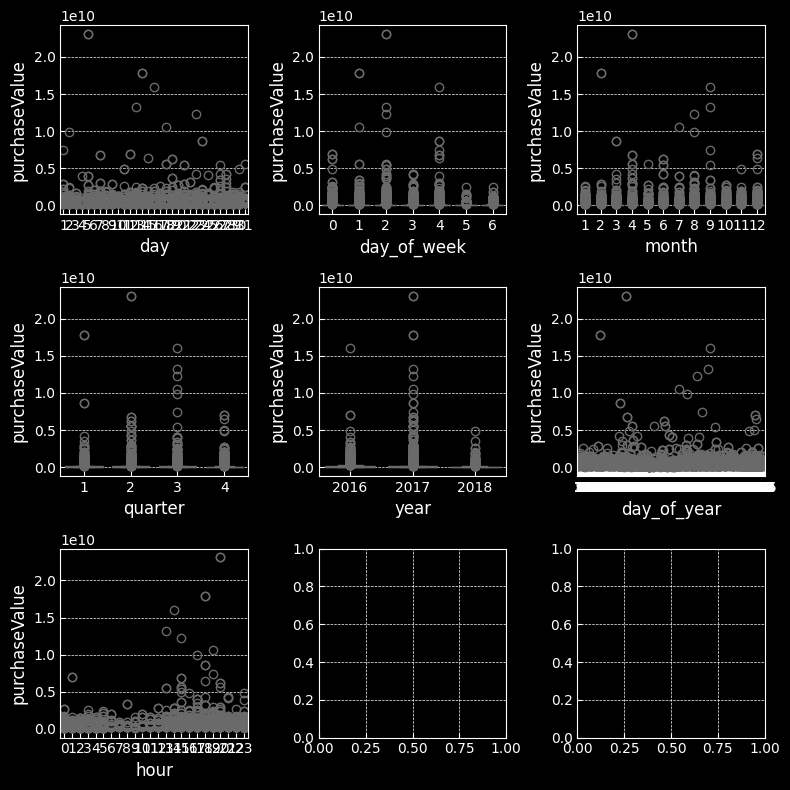

In [63]:
import math
def visualize_target_by_time(df,columns_):
    cols  =  3
    rows  = math.ceil(len(columns_)/cols)
    fig, ax = plt.subplots(rows,cols,figsize=(8,8))
    axes = ax.flatten()
    
    for idx, col in enumerate(columns_):
        sns.boxplot(df, x=col, y="purchaseValue", ax=axes[idx])
    plt.tight_layout()
    plt.show()
visualize_target_by_time(purchases, TIME)

In [64]:
cols_to_drop = [
    'userId', 'sessionId']
train_df4, test_df4 = drop_cols(train_df3, test_df3,cols_to_drop)

['purchaseValue'] (116023, 42) (29006, 41)


In [65]:
columns  =  get_int_str_cols(train_df4)

Distribution correct: False
Total cols: 42 
Numerical: 19 
Categorical: 22 
time cols 0


In [66]:
train_df5, test_df5 =train_df4.copy(), test_df4.copy()
train_df5, test_df5  = drop_cols(train_df5, test_df5, "trafficSource.campaign")

['purchaseValue'] (116023, 41) (29006, 40)


In [67]:
train_df5

trafficSource.isTrueDirect  purchaseValue            browser  \
0                                0           0.00               Edge   
1                                1           0.00             Chrome   
2                                1           0.00             Chrome   
3                                0           0.00  Internet Explorer   
4                                1  88,950,000.00             Chrome   
...                            ...            ...                ...   
116018                           0  35,180,000.00             Chrome   
116019                           1           0.00             Chrome   
116020                           1           0.00             Chrome   
116021                           0           0.00             Chrome   
116022                           1  81,470,000.00             Chrome   

       trafficSource.adContent trafficSource.keyword geoCluster  \
0                          NaN               unknown   Region_2   
1                          NaN               unknown   Region_3   
2                          NaN                 other   Region_2   
3                          NaN               unknown   Region_4   
4                          NaN               unknown   Region_3   
...                        ...                   ...        ...   
116018                     NaN               unknown   Region_3   
116019                     NaN               unknown   Region_5   
116020                     NaN               unknown   Region_1   
116021                     NaN                 other   Region_5   
116022                     NaN                 other   Region_5   

       trafficSource.adwordsClickInfo.slot geoNetwork.networkDomain  \
0                                   Not_Ad                  domain1   
1                                   Not_Ad                  domain3   
2                                   Not_Ad                  domain1   
3                                   Not_Ad                  domain3   
4                                   Not_Ad                  domain1   
...                                    ...                      ...   
116018                              Not_Ad                  domain1   
116019                              Not_Ad                  domain2   
116020                              Not_Ad                  domain2   
116021                              Not_Ad                  domain1   
116022                              Not_Ad                  domain2   

        gclIdPresent  sessionNumber              geoNetwork.region  \
0                  0              1                     Washington   
1                  0              1                     California   
2                  0              2                       Lombardy   
3                  0              1  not available in demo dataset   
4                  0              1  not available in demo dataset   
...              ...            ...                            ...   
116018             0              1                       New York   
116019             0              1                     California   
116020             0              2                          Delhi   
116021             0              1                      Tennessee   
116022             0              4  not available in demo dataset   

           trafficSource         os geoNetwork.subContinent  \
0            youtube.com    Windows        Northern America   
1               (direct)  Macintosh        Northern America   
2                 google    Windows         Southern Europe   
3            youtube.com    Windows            Eastern Asia   
4               (direct)    Windows        Northern America   
...                  ...        ...                     ...   
116018          (direct)  Macintosh        Northern America   
116019          (direct)  Macintosh        Northern America   
116020  seroundtable.com    Windows           Southern Asia   
116021        

In [68]:
train_df5["year"]=train_df5["year"].astype(str)
test_df5["year"]=test_df5["year"].astype(str)
columns = get_int_str_cols(train_df5)

Distribution correct: False
Total cols: 41 
Numerical: 18 
Categorical: 22 
time cols 0


In [69]:
g=['day', 'month', 'hour']
def cyclically_incode_timeseries_data(df):
  time_cols = ['hour', 'day', 'month']

  # encode hour cols
  df["hour_sin"] = df["hour"].apply(lambda x:np.sin((2 * np.pi * x/24)))
  df["hour_cos"] = df["hour"].apply(lambda x:np.cos((2 * np.pi * x/24)))

  # encode day of week cols
  df["day_sin"] = df["day"].apply(lambda x:np.sin((2 * np.pi * x/12)))
  df["day_cos"] = df["day"].apply(lambda x:np.cos((2 * np.pi * x/12)))

  # encode month cols
  df["month_sin"] = df["month"].apply(lambda x: np.sin((2 * np.pi * x/7)))
  df["month_cos"] = df["month"].apply(lambda x: np.cos((2 * np.pi * x/7)))

  df_  = df.drop(columns=time_cols,axis=1)
  return df_

In [70]:
train_df5 = cyclically_incode_timeseries_data(train_df5)
test_df5 = cyclically_incode_timeseries_data(test_df5)


In [71]:
columns = get_int_str_cols(train_df5)

Distribution correct: False
Total cols: 44 
Numerical: 21 
Categorical: 22 
time cols 0


In [72]:
np.random.seed(23)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

X_test = test_df5.copy()

X = train_df5.drop("purchaseValue",axis=1)
y = train_df5["purchaseValue"]

y_train_bin  = y.apply(lambda x: 0 if x<=y.quantile(.9) else 1)
columns  =  get_int_str_cols(X) 

Distribution correct: False
Total cols: 43 
Numerical: 20 
Categorical: 22 
time cols 0


In [73]:
X.shape

(116023, 43)

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [75]:
X.shape, X_test.shape

((116023, 43), (29006, 43))

In [76]:
import re

def clean_column_names(df):
    df.columns = [
        re.sub(r'[^\w]', '_', col)
        for col in df.columns
    ]
    return df

X = clean_column_names(X)
X_test = clean_column_names(X_test)  # also clean test set if used


In [77]:
columns = get_int_str_cols(X)

Distribution correct: False
Total cols: 43 
Numerical: 20 
Categorical: 22 
time cols 0


In [78]:
numeric_trans  =  Pipeline(steps=[("imputer",SimpleImputer(strategy="mean")),
                                   ("scaler",StandardScaler())
                                   ])

cat_cols_trans = Pipeline(steps=[("imputer",SimpleImputer(strategy="most_frequent")),("ohe",
                                                                                      OneHotEncoder(handle_unknown="ignore",sparse_output=False)
                                                                                      )])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_trans, columns["num_cols"]),
        ('cat_cols', cat_cols_trans,columns["cat_cols"][3:]),
    ],
    remainder='drop'  
)
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [79]:
full_pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['trafficSource_isTrueDirect',
                                                   'gclIdPresent',
                                                   'sessionNumber',
                                                   'trafficSource_adwordsClickInfo_isVideoAd',
                                                   'trafficSource_adwordsClickInfo_page',
                                                   'pageViews',
                                                   'totals_bounces',
                                                   'totalHits', 'new_visits',
                                                   'day_of_w...
                                                   'trafficSource_adwordsClickInfo_slot',
                                                   'geoNetwork_networkDomain',
                                                   'geoNetwork_region',
                                                   'trafficSource', 'os',
                                                   'geoNetwork_subContinent',
                                                   'trafficSource_medium',
                                                   'locationCountry',
                                                   'trafficSource_adwordsClickInfo_adNetworkType',
                                                   'geoNetwork_city',
                                                   'geoNetwork_metro',
                                                   'trafficSource_referralPath',
                                                   'deviceType', 'userChannel',
                                                   'geoNetwork_continent',
                                                   'device_isMobile', 'year',
                                                   'date'])]))])

In [80]:
col_names = preprocessor.get_feature_names_out()

In [81]:
X_train_trans = pd.DataFrame(full_pipeline.transform(X), columns=col_names)
# X_val_trans  = pd.DataFrame(full_pipeline.transform(X_val),columns=col_names)
X_test_trans  = pd.DataFrame(full_pipeline.transform(X_test),columns=col_names)


import re

def clean_column_names(df):
    df.columns = [
        re.sub(r'[^\w]', '_', col)
        for col in df.columns
    ]
    return df

X_train_trans = clean_column_names(X_train_trans)
X_test_trans = clean_column_names(X_test_trans)  # also clean test set if used


In [82]:
from sklearn.model_selection import train_test_split
X_train, x_val, y_train, y_val = train_test_split(X_train_trans, y)
(X_train_trans.shape,X_test_trans.shape)

((116023, 3225), (29006, 3225))

In [83]:
import xgboost as xgb


## XGBRegressor hyper parameter tuning

In [84]:
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(random_state=42, n_jobs=1)

xgb_params = {
    'n_estimators':[150,289,300],
    'learning_rate': uniform(0.1, 0.2),
    'subsample': [0.6, 0.4],
    'colsample_bytree': [0.4,0.45,0.5,0.55,0.6]
}

search_xgb = RandomizedSearchCV(
    xgb, xgb_params, n_iter=30, cv=3, scoring='neg_root_mean_squared_error',
    random_state=42, verbose=3, n_jobs=1
)
print("Tuning XGB")
# search_xgb.fit(X_train, y_train)
# xgb_best = search_xgb.best_estimator_
# xgb_score = -search_xgb.best_score_ 
# print(f"XGBoost Best RMSE: {xgb_score:.4f}")

Tuning XGB


In [85]:
xgb_best  =  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7306163075223342, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.12408879488107988, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=np.nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=289, n_jobs=1,
             num_parallel_tree=None, random_state=42)
print("fitting")
xgb_best.fit(X_train_trans, y) 

fitting


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7306163075223342, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.12408879488107988,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=289, n_jobs=1,
             num_parallel_tree=None, ...)

## LGBMRegressor hyper parameter tuning

In [86]:
from lightgbm import LGBMRegressor
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

lgbm =  LGBMRegressor(random_state=42, n_jobs=1)

lgbm_params = {
    'n_estimators': [100,200],
    'max_depth': [3, 8],
    'learning_rate': [0.01, 0.2, 0.15],
    'subsample':[0.6, 0.4],
    'colsample_bytree': [0.6, 0.4]
}

search_lgbm = RandomizedSearchCV(
    lgbm, lgbm_params,
    n_iter=10,
    cv=2,
    scoring='neg_root_mean_squared_error',
    verbose=3,
    n_jobs=1
)
print("Tuning LGBM")
search_lgbm.fit(
    X_train_trans, y,
    eval_set=[(X_train_trans, y)],
    # early_stopping_rounds=20,
    # verbose=False
)

lgbm_best = search_lgbm.best_estimator_
lgbm_score = -search_lgbm.best_score_
print(f"LightGBM Best RMSE: {lgbm_score:.4f}")

Tuning LGBM
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 58011, number of used features: 1179
[LightGBM] [Info] Start training from score 26777756.276292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

## Ridge Regressor

In [87]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge_params = {
    'alpha': uniform(0.1, 10.0)
}
search_ridge = RandomizedSearchCV(
    ridge, ridge_params, n_iter=30, cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42, verbose=1, n_jobs=1
)
print("Tuning Ridge")

search_ridge.fit(X_train_trans, y)
ridge_best = search_ridge.best_estimator_
ridge_score = -search_ridge.best_score_ 
print(f"Ridge Best RMSE: {ridge_score:.4f}") 

Tuning Ridge
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Ridge Best RMSE: 191786796.4863


In [88]:
scores = {
    # 'XGBoost': (xgb_score, xgb_best),
    'LightGBM': (lgbm_score, lgbm_best),
    'Ridge': (ridge_score, ridge_best)
}

In [89]:
for model_name, (score, _) in scores.items():
    print(f"{model_name} RMSE: {score:.4f}")

LightGBM RMSE: 167984978.6082
Ridge RMSE: 191786796.4863


In [90]:
best_model_name = min(scores, key=lambda name: scores[name][0])
best_model = scores[best_model_name][1]
print(f"selected: {best_model_name}") 

selected: LightGBM


In [91]:
y_pred = pd.Series(best_model.predict(X_test_trans), index=X_test_trans.index)

In [92]:
(y_pred==0).sum()

np.int64(0)

In [93]:
submission_df = pd.DataFrame({
    "id": y_pred.index,
    "target": y_pred
})

submission_df.to_csv("submission.csv", index=False)
print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!
